MasterCamp TD Project

In [456]:
%reset

import all librairies

In [457]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



Get Database

In [458]:
data=next(pd.read_csv("data/valeursfoncieres-2023.txt",chunksize=100000,sep="|",decimal=","))
data=data.drop(["Identifiant de document","Reference document","1 Articles CGI","2 Articles CGI","3 Articles CGI","4 Articles CGI","5 Articles CGI","Identifiant local","Type de voie","Voie","B/T/Q","Code voie","Code postal","Commune","No voie","Type local"],axis=1)
same=data.head(3)
diff=data.head(5)
print(data.head(1))

   No disposition Date mutation Nature mutation  Valeur fonciere  \
0               1    05/01/2023           Vente        1070000.0   

   Code departement  Code commune  Prefixe de section Section  No plan  \
0                 1           354                 NaN      BD      334   

   No Volume  ... Surface Carrez du 4eme lot  5eme lot  \
0        NaN  ...                        NaN       NaN   

  Surface Carrez du 5eme lot  Nombre de lots  Code type local  \
0                        NaN               1              3.0   

   Surface reelle bati  Nombre pieces principales  Nature culture  \
0                  0.0                        0.0             NaN   

   Nature culture speciale  Surface terrain  
0                      NaN              NaN  

[1 rows x 27 columns]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/978291523.py:1: DtypeWarning: Columns (24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data=next(pd.read_csv("data/valeursfoncieres-2023.txt",chunksize=100000,sep="|",decimal=","))


Study the Database to choose the best inforamation available

In [459]:
def compare_column_values(df):
    comparison_result = {}
    for column in df.columns:
        if df[column].nunique() == 1:
            comparison_result[column] = 'Same'
        else:
            comparison_result[column] = 'Different'
    return comparison_result

# Compare the values in the selected subset
comparison_result = compare_column_values(same)
print(comparison_result)
print(compare_column_values(diff))

{'No disposition': 'Same', 'Date mutation': 'Same', 'Nature mutation': 'Same', 'Valeur fonciere': 'Same', 'Code departement': 'Same', 'Code commune': 'Same', 'Prefixe de section': 'Different', 'Section': 'Same', 'No plan': 'Different', 'No Volume': 'Different', '1er lot': 'Different', 'Surface Carrez du 1er lot': 'Different', '2eme lot': 'Different', 'Surface Carrez du 2eme lot': 'Different', '3eme lot': 'Different', 'Surface Carrez du 3eme lot': 'Different', '4eme lot': 'Different', 'Surface Carrez du 4eme lot': 'Different', '5eme lot': 'Different', 'Surface Carrez du 5eme lot': 'Different', 'Nombre de lots': 'Same', 'Code type local': 'Different', 'Surface reelle bati': 'Different', 'Nombre pieces principales': 'Different', 'Nature culture': 'Different', 'Nature culture speciale': 'Different', 'Surface terrain': 'Different'}
{'No disposition': 'Same', 'Date mutation': 'Different', 'Nature mutation': 'Same', 'Valeur fonciere': 'Different', 'Code departement': 'Same', 'Code commune': '

In [460]:
print(data.dtypes)

No disposition                  int64
Date mutation                  object
Nature mutation                object
Valeur fonciere               float64
Code departement                int64
Code commune                    int64
Prefixe de section            float64
Section                        object
No plan                         int64
No Volume                     float64
1er lot                        object
Surface Carrez du 1er lot     float64
2eme lot                       object
Surface Carrez du 2eme lot    float64
3eme lot                      float64
Surface Carrez du 3eme lot    float64
4eme lot                      float64
Surface Carrez du 4eme lot    float64
5eme lot                      float64
Surface Carrez du 5eme lot    float64
Nombre de lots                  int64
Code type local               float64
Surface reelle bati           float64
Nombre pieces principales     float64
Nature culture                 object
Nature culture speciale        object
Surface terr

Get the Database and filter the values

In [461]:
file_path = "data/valeursfoncieres-2023.txt"
sampled_df = pd.read_csv(file_path, sep="|", decimal=",",header=0)
# Drop unnecessary columns
sampled_df = sampled_df.drop(["Identifiant de document", "Reference document", "1 Articles CGI", "2 Articles CGI",
                              "3 Articles CGI", "4 Articles CGI", "5 Articles CGI", "Identifiant local", 
                              "Type de voie", "Voie", "B/T/Q", "Code voie", "Code postal", "Commune", 
                              "No voie", "Type local"], axis=1)

# Drop rows with NaN values in specified columns
sampled_df = sampled_df.dropna(subset=['Code departement', 'Code commune', 'Section', 
                                       'Date mutation', 'Valeur fonciere', 'Code type local'])

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/1994007165.py:2: DtypeWarning: Columns (14,18,23,24,26,28,32,41) have mixed types. Specify dtype option on import or set low_memory=False.
  sampled_df = pd.read_csv(file_path, sep="|", decimal=",",header=0)


In [462]:
#--------------------------
#use if cannot load the file
#--------------------------
"""
file_path = "data/valeursfoncieres-2023.txt"
total_lines = 3727006  # Total number of lines in your file
sample_size = 740000  # The target number of sampled lines

# Randomly select line indices to sample
np.random.seed(42)  # For reproducibility
random_indices = np.sort(np.random.choice(range(total_lines), size=sample_size, replace=False))

# List to store each sampled DataFrame
dfs = []

# Use an iterator to process the file in chunks
chunk_size = 10000
iterator = pd.read_csv(file_path, sep="|", decimal=",", chunksize=chunk_size, header=0)

# Current position in the file
current_position = 0

for df_chunk in iterator:
    chunk_end = current_position + len(df_chunk)
    
    # Select the random indices that fall within the current chunk
    chunk_indices = (random_indices >= current_position) & (random_indices < chunk_end)
    selected_indices = random_indices[chunk_indices] - current_position
    
    # Select the rows from the chunk and append to the list
    if len(selected_indices) > 0:
        df_sampled = df_chunk.iloc[selected_indices]
        dfs.append(df_sampled)
    
    # Update the current position
    current_position = chunk_end

# Combine all sampled chunks into a single DataFrame
sampled_df = pd.concat(dfs, ignore_index=True)

# Drop unnecessary columns
sampled_df = sampled_df.drop(["Identifiant de document", "Reference document", "1 Articles CGI", "2 Articles CGI",
                              "3 Articles CGI", "4 Articles CGI", "5 Articles CGI", "Identifiant local", 
                              "Type de voie", "Voie", "B/T/Q", "Code voie", "Code postal", "Commune", 
                              "No voie", "Type local"], axis=1)

# Drop rows with NaN values in specified columns
sampled_df = sampled_df.dropna(subset=['Code departement', 'Code commune', 'Prefixe de section', 'Section', 
                                       'Date mutation', 'Valeur fonciere', 'Code type local'])

# Now you can work with the sampled_df DataFrame
print(sampled_df['Code departement'].value_counts())
print(sampled_df.tail(10))
"""


'\nfile_path = "data/valeursfoncieres-2023.txt"\ntotal_lines = 3727006  # Total number of lines in your file\nsample_size = 740000  # The target number of sampled lines\n\n# Randomly select line indices to sample\nnp.random.seed(42)  # For reproducibility\nrandom_indices = np.sort(np.random.choice(range(total_lines), size=sample_size, replace=False))\n\n# List to store each sampled DataFrame\ndfs = []\n\n# Use an iterator to process the file in chunks\nchunk_size = 10000\niterator = pd.read_csv(file_path, sep="|", decimal=",", chunksize=chunk_size, header=0)\n\n# Current position in the file\ncurrent_position = 0\n\nfor df_chunk in iterator:\n    chunk_end = current_position + len(df_chunk)\n    \n    # Select the random indices that fall within the current chunk\n    chunk_indices = (random_indices >= current_position) & (random_indices < chunk_end)\n    selected_indices = random_indices[chunk_indices] - current_position\n    \n    # Select the rows from the chunk and append to the li

In [463]:
"""
# Replace NaN values with empty strings for string columns
sampled_df['Code departement'] = sampled_df['Code departement'].fillna('')
sampled_df['Code commune'] = sampled_df['Code commune'].fillna('')
sampled_df['Prefixe de section'] = sampled_df['Prefixe de section'].fillna('')
sampled_df['Section'] = sampled_df['Section'].fillna('')
sampled_df['Date mutation'] = sampled_df['Date mutation'].fillna('')

# Convert necessary columns to appropriate data types
sampled_df['Surface terrain'] = sampled_df['Surface terrain'].astype(float)
sampled_df['Surface reelle bati'] = sampled_df['Surface reelle bati'].astype(float)

# Calculate combined surface
#sampled_df['Surface_combined'] = sampled_df['Surface terrain'] + sampled_df['Surface reelle bati']
sampled_df['Surface_combined'] = sampled_df['Surface reelle bati']

# Group by relevant columns and aggregate the data
aggregated_data = sampled_df.groupby(['Code departement', 'Code commune', 'Prefixe de section', 'Section', 'Date mutation']).agg({
    'Valeur fonciere': 'mean',
    'Surface_combined': 'sum',
    'Code type local': 'min'  
}).reset_index()

# remove those with value = to 0
aggregated_data = aggregated_data[aggregated_data['Surface_combined'] != 0]

# Convert aggregated columns to appropriate data types
aggregated_data['Code departement'] = aggregated_data['Code departement'].astype(str)
aggregated_data['Code commune'] = aggregated_data['Code commune'].astype(str)
aggregated_data['Prefixe de section'] = aggregated_data['Prefixe de section'].astype(str)
aggregated_data['Section'] = aggregated_data['Section'].astype(str)
aggregated_data['Date mutation'] = aggregated_data['Date mutation'].astype(str)

# Calculate Id
aggregated_data['Id'] = aggregated_data['Code departement'] + aggregated_data['Code commune'] + aggregated_data['Prefixe de section'] + aggregated_data['Section'] + aggregated_data['Date mutation']

# Print the first few rows to verify the result
print(aggregated_data.head())
"""

"\n# Replace NaN values with empty strings for string columns\nsampled_df['Code departement'] = sampled_df['Code departement'].fillna('')\nsampled_df['Code commune'] = sampled_df['Code commune'].fillna('')\nsampled_df['Prefixe de section'] = sampled_df['Prefixe de section'].fillna('')\nsampled_df['Section'] = sampled_df['Section'].fillna('')\nsampled_df['Date mutation'] = sampled_df['Date mutation'].fillna('')\n\n# Convert necessary columns to appropriate data types\nsampled_df['Surface terrain'] = sampled_df['Surface terrain'].astype(float)\nsampled_df['Surface reelle bati'] = sampled_df['Surface reelle bati'].astype(float)\n\n# Calculate combined surface\n#sampled_df['Surface_combined'] = sampled_df['Surface terrain'] + sampled_df['Surface reelle bati']\nsampled_df['Surface_combined'] = sampled_df['Surface reelle bati']\n\n# Group by relevant columns and aggregate the data\naggregated_data = sampled_df.groupby(['Code departement', 'Code commune', 'Prefixe de section', 'Section', 'Dat

In [464]:
# Replace NaN values with empty strings for string columns
sampled_df['Code departement'] = sampled_df['Code departement'].fillna('')
sampled_df['Code commune'] = sampled_df['Code commune'].fillna('')
sampled_df['Prefixe de section'] = sampled_df['Prefixe de section'].fillna('')
sampled_df['Section'] = sampled_df['Section'].fillna('')
sampled_df['Date mutation'] = sampled_df['Date mutation'].fillna('')

# Convert necessary columns to appropriate data types
sampled_df['Surface terrain'] = sampled_df['Surface terrain'].astype(float)
sampled_df['Surface reelle bati'] = sampled_df['Surface reelle bati'].astype(float)

# Calculate combined surface
#sampled_df['Surface_combined'] = sampled_df['Surface terrain'] + sampled_df['Surface reelle bati']
sampled_df['Surface_combined'] = sampled_df['Surface reelle bati']

# Group by relevant columns and aggregate the data
def custom_agg(group):
    min_code_type_local = group['Code type local'].min()
    surface_combined_sum = group.loc[group['Code type local'] == min_code_type_local, 'Surface_combined'].sum()
    return pd.Series({
        'Valeur fonciere': group['Valeur fonciere'].mean(),
        'Surface_combined': surface_combined_sum,
        'Code type local': min_code_type_local
    })

aggregated_data = sampled_df.groupby(
    ['Code departement', 'Code commune', 'Prefixe de section', 'Section', 'Date mutation']
).apply(custom_agg).reset_index()

# remove those with value = to 0
aggregated_data = aggregated_data[aggregated_data['Surface_combined'] != 0]

# Convert aggregated columns to appropriate data types
aggregated_data['Code departement'] = aggregated_data['Code departement'].astype(str)
aggregated_data['Code commune'] = aggregated_data['Code commune'].astype(str)
aggregated_data['Prefixe de section'] = aggregated_data['Prefixe de section'].astype(str)
aggregated_data['Section'] = aggregated_data['Section'].astype(str)
aggregated_data['Date mutation'] = aggregated_data['Date mutation'].astype(str)

# Calculate Id
aggregated_data['Id'] = aggregated_data['Code departement'] + aggregated_data['Code commune'] + aggregated_data['Prefixe de section'] + aggregated_data['Section'] + aggregated_data['Date mutation']

# Print the first few rows to verify the result
print(aggregated_data.head())


  Code departement Code commune Prefixe de section Section Date mutation  \
0                1            1                          A    13/11/2023   
1                1            1                         ZC    01/12/2023   
2                1            1                         ZH    07/06/2023   
3                1            1                         ZH    19/01/2023   
4                1            1                         ZH    21/03/2023   

   Valeur fonciere  Surface_combined  Code type local              Id  
0         420000.0             288.0              1.0   11A13/11/2023  
1         155000.0             166.0              1.0  11ZC01/12/2023  
2         210000.0             100.0              1.0  11ZH07/06/2023  
3         270000.0             234.0              1.0  11ZH19/01/2023  
4         240000.0             101.0              1.0  11ZH21/03/2023  


Some analysis

In [465]:

# Group by type and calculate average value
average_values_by_type = aggregated_data.groupby('Code type local')['Valeur fonciere'].mean()

print(average_values_by_type)

Code type local
1.0    271075.489154
2.0    259212.612126
3.0      7500.000000
4.0    671230.014603
Name: Valeur fonciere, dtype: float64


In [466]:
# Convert necessary columns to appropriate data types

aggregated_data['Valeur fonciere'] = aggregated_data['Valeur fonciere'].astype(float)


# Group by type and calculate average value
average_values_by_departement = aggregated_data.groupby('Code departement')['Valeur fonciere'].mean()

print(average_values_by_departement)

Code departement
1      285833.675322
10     159800.153766
11     167336.150950
12     149072.207910
13     340122.794090
           ...      
95     336986.657375
971    346091.831271
972    262345.364980
973    281961.546330
974    281023.306506
Name: Valeur fonciere, Length: 97, dtype: float64


Find specific Data

In [467]:
desired_id="1354BD05/01/2023"
transaction_info = aggregated_data[aggregated_data['Id'] == desired_id]

# Display the information of the transaction
print(transaction_info)

     Code departement Code commune Prefixe de section Section Date mutation  \
6730                1          354                         BD    05/01/2023   

      Valeur fonciere  Surface_combined  Code type local                Id  
6730        1070000.0             233.0              2.0  1354BD05/01/2023  


In [468]:
desired_id="12AC09/01/2023"
code_departement="1"
code_commune="446"
Section="ZL"
Date_mutation="06/01/2023"
transaction_info = aggregated_data[aggregated_data['Code departement'] == int(code_departement)]
transaction_info = transaction_info[transaction_info['Code commune'] == int(code_commune)]
transaction_info = transaction_info[transaction_info['Section'] == Section]
transaction_info = transaction_info[transaction_info['Date mutation'] == Date_mutation]

#transaction_info = data[data['Code commune'] == int(code_commune)]

print(transaction_info)

Empty DataFrame
Columns: [Code departement, Code commune, Prefixe de section, Section, Date mutation, Valeur fonciere, Surface_combined, Code type local, Id]
Index: []


Linear Regression

Valeur vs Surface_combined,Code departement for all data

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/1783404276.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Mean Absolute Error: 172312.07573582564
Model Coefficients: [ 4.95513151e+04 -7.25466127e+04 -5.76018320e+04 -8.32130016e+04
  1.16259798e+05  1.00350842e+04 -1.07370074e+05 -7.81493240e+04
  6.05821205e+04 -1.18884074e+05 -9.22085555e+04 -9.55025221e+04
 -1.71200655e+04 -3.60620477e+04 -1.40724615e+05 -7.32264077e+04
 -4.46858349e+04 -8.66107999e+02 -3.76758354e+04 -3.96729310e+04
 -2.01564681e+04  2.27434738e+05  2.93068132e+04 -1.16877457e+05
  2.00225537e+04  4.01310264e+04 -5.45249668e+04  1.39891410e+05
  2.88937373e+04  3.49987688e+04 -1.23116803e+05 -1.74906081e+04
  2.30012557e+04 -6.77996386e+04 -3.77396322e+04  4.75296337e+04
 -7.33392010e+04 -6.19174615e+04 -8.59478401e+04  8.02812612e+04
 -3.81842298e+04 -7.73183545e+04 -6.56536779e+04 -8.72460545e+04
 -1.92636069e+04 -1.08441781e+04 -3.62168353e+04 -2.74861691e+04
 -1.11912133e+05 -8.55118939e+04 -1.91326776e+04 -1.04894187e+05
  2.59713356e+04 -1.21958717e+05  9.78647118e+02  2.00779294e+05
  1.71839729e+04 -5.63427437e+

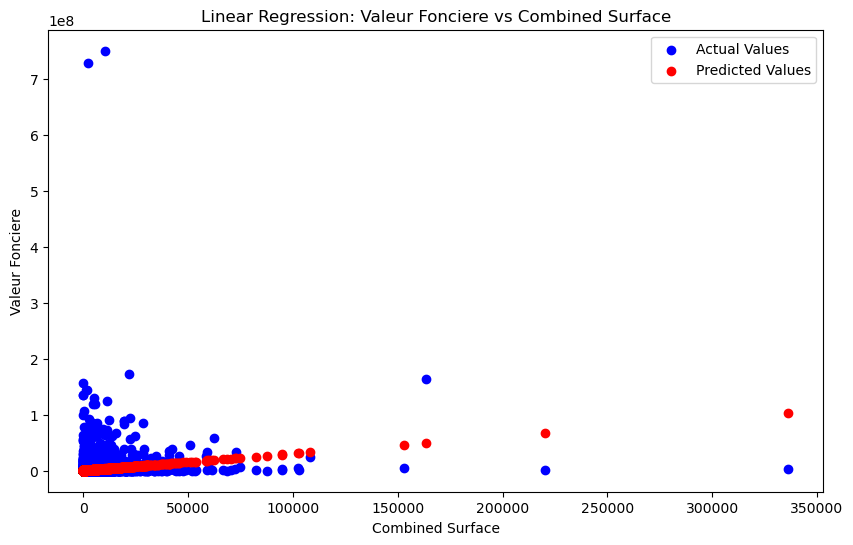

In [469]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

encoder = OneHotEncoder()
column_transformer = ColumnTransformer(
    [('encoder', encoder, ['Code departement'])], 
    remainder='passthrough'
)

# Create a pipeline with the column transformer and the linear regression model
model = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

# Define X and y
X = aggregated_data[['Surface_combined', 'Code departement']]
y = aggregated_data['Valeur fonciere']

# Normalize the numerical feature 'Surface_combined'
scaler = MinMaxScaler()
X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])

# Fit the model
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Calculate Mean absoltue Error
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)
print("Model Coefficients:", model.named_steps['regressor'].coef_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_data['Surface_combined'], y, color='blue', label='Actual Values')
plt.scatter(aggregated_data['Surface_combined'], y_pred, color='red', label='Predicted Values')
plt.xlabel('Combined Surface')
plt.ylabel('Valeur Fonciere')
plt.title('Linear Regression: Valeur Fonciere vs Combined Surface')
plt.legend()
plt.show()

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/1395262644.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Mean Absolute Error: 170837.47944096883
Model Coefficients: [ 4.73298092e+04 -6.98606298e+04 -5.96564141e+04 -8.36177289e+04
  1.17768998e+05  7.99608220e+03 -1.08084609e+05 -7.78919166e+04
  5.74916299e+04 -1.20007544e+05 -9.43841009e+04 -9.67728362e+04
 -1.59260924e+04 -3.34325496e+04 -1.40698574e+05 -7.86008839e+04
 -4.11284104e+04  1.71551565e+03 -3.83093963e+04 -4.34627972e+04
 -2.18391722e+04  2.45765825e+05  2.85570049e+04 -1.12750783e+05
  9.32983419e+03  3.63739624e+04 -5.27281792e+04  1.45701591e+05
  2.89577894e+04  3.66119929e+04 -1.23546544e+05 -1.83857069e+04
  1.82474866e+04 -6.53155275e+04 -3.93706996e+04  4.61621053e+04
 -7.39445120e+04 -6.43086913e+04 -8.44255216e+04  8.10346312e+04
 -3.76340552e+04 -7.26027340e+04 -6.26038902e+04 -9.22768600e+04
 -1.93449372e+04 -2.98041568e+04 -3.27389063e+04 -2.93977863e+04
 -1.08456986e+05 -8.22453585e+04 -1.86080209e+04 -1.05707284e+05
  2.40236443e+04 -1.22874757e+05  6.44317110e+03  1.95857125e+05
  2.53160573e+04 -6.00426473e+

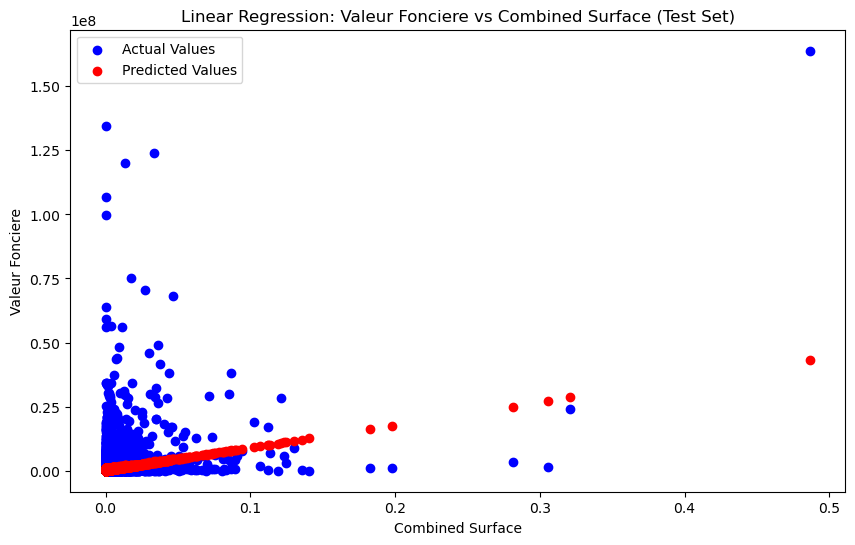

In [470]:
# Define the column transformer with one-hot encoder
encoder = OneHotEncoder()
column_transformer = ColumnTransformer(
    [('encoder', encoder, ['Code departement'])], 
    remainder='passthrough'
)

# Create a pipeline with the column transformer and the linear regression model
model = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

# Define X and y
X = aggregated_data[['Surface_combined', 'Code departement']]
y = aggregated_data['Valeur fonciere']
# Normalize the numerical feature 'Surface_combined'
scaler = MinMaxScaler()
X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model on the training set
model.fit(X_train, y_train)

# Predict values on the testing set
y_pred = model.predict(X_test)

# Calculate Mean absoltue Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Model Coefficients:", model.named_steps['regressor'].coef_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Surface_combined'], y_test, color='blue', label='Actual Values')
plt.scatter(X_test['Surface_combined'], y_pred, color='red', label='Predicted Values')
plt.xlabel('Combined Surface')
plt.ylabel('Valeur Fonciere')
plt.title('Linear Regression: Valeur Fonciere vs Combined Surface (Test Set)')
plt.legend()
plt.show()


In [471]:
specific_code_departement = "75"

# Filter the data for the specific Code departement
median_data = aggregated_data[aggregated_data['Code departement'] == specific_code_departement]
km2=(median_data["Valeur fonciere"]/median_data["Surface_combined"]).mean()
print(km2)


11030.37085259623


In [472]:
unique_departments = aggregated_data['Code departement'].unique()

# Initialize an empty dictionary to store results
department_medians = {}

# Loop through each department code
for dept in unique_departments:
    # Filter the data for the specific department
    median_data = aggregated_data[aggregated_data['Code departement'] == dept]
    
    # Calculate the median value of `Valeur fonciere` / `Surface_combined`
    km2_median = (median_data["Valeur fonciere"] / median_data["Surface_combined"]).median()
    
    # Store the result in the dictionary
    department_medians[dept] = km2_median

# Find the minimum median value and its corresponding department
min_dept = min(department_medians, key=department_medians.get)
min_value = department_medians[min_dept]

# Print the result
print(f"Department with the minimum median value: {min_dept}")
print(f"Minimum median value: {min_value}")

Department with the minimum median value: 23
Minimum median value: 709.0909090909091


Mean Absolute Error: 189409.74109622187
Model Coefficients: [1.00862029e+08]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/3602740924.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


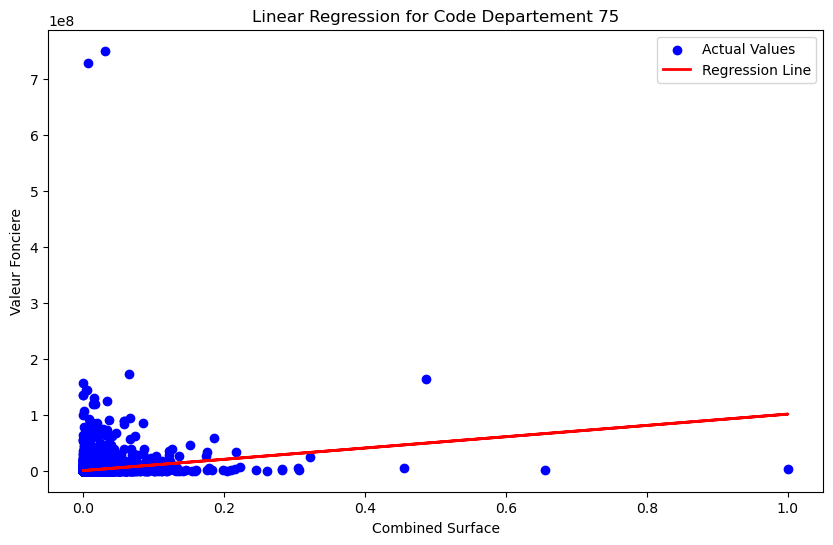

In [473]:
# Define X and y for the filtered data
X = aggregated_data[['Surface_combined']]
y = aggregated_data['Valeur fonciere']
# Normalize the numerical feature 'Surface_combined'
scaler = MinMaxScaler()
X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])
# Create and fit the model
model = LinearRegression()
model.fit(X, y)


# Predict values
y_pred = model.predict(X)

# Calculate Mean Squared Error
# Calculate Mean absoltue Error
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)
print("Model Coefficients:", model.coef_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Values')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Combined Surface')
plt.ylabel('Valeur Fonciere')
plt.title(f'Linear Regression for Code Departement {specific_code_departement}')
plt.legend()
plt.show()

Part With Time

Get the files

In [474]:
# List of file paths (you can add more paths to this list as needed)
file_paths = [
    "data/valeursfoncieres-2023.txt",
    "data/valeursfoncieres-2022.txt",
    "data/valeursfoncieres-2021.txt",
    "data/valeursfoncieres-2020.txt",
    "data/valeursfoncieres-2019.txt"
]

# List to hold dataframes
dfs = []

# Read each file and append the dataframe to the list
for file_path in file_paths:
    df = pd.read_csv(file_path, sep="|", decimal=",", header=0)
    dfs.append(df)

# Combine all chunks into one DataFrame
multiple_time = pd.concat(dfs, ignore_index=True)

# Drop unnecessary columns
multiple_time = multiple_time.drop([
    "Identifiant de document", "Reference document", "1 Articles CGI", 
    "2 Articles CGI", "3 Articles CGI", "4 Articles CGI", 
    "5 Articles CGI", "Identifiant local", "Type de voie", 
    "Voie", "B/T/Q", "Code voie", "Code postal", 
    "Commune", "No voie", "Type local"
], axis=1)

# Drop rows with NaN values in specified columns
multiple_time = multiple_time.dropna(subset=[
    'Code departement', 'Code commune', 'Section', 
    'Date mutation', 'Valeur fonciere', 'Code type local'
])

print("Data loaded and combined.")
print(multiple_time.head())


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/3576829241.py:15: DtypeWarning: Columns (14,18,23,24,26,28,32,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="|", decimal=",", header=0)
/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/3576829241.py:15: DtypeWarning: Columns (18,23,24,26,28,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="|", decimal=",", header=0)
/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/3576829241.py:15: DtypeWarning: Columns (18,23,24,26,28,30,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="|", decimal=",", header=0)
/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/3576829241.py:15: DtypeWarning: Columns (18,23,24,26,28,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd

Data loaded and combined.
   No disposition Date mutation Nature mutation  Valeur fonciere  \
0               1    05/01/2023           Vente        1070000.0   
1               1    05/01/2023           Vente        1070000.0   
2               1    05/01/2023           Vente        1070000.0   
3               1    03/01/2023           Vente         152200.0   
4               1    05/01/2023           Vente         269000.0   

  Code departement  Code commune  Prefixe de section Section  No plan  \
0                1           354                 NaN      BD      334   
1                1           354                 NaN      BD      336   
2                1           354                 NaN      BD      336   
3                1           404                 NaN       D     2317   
4                1           361                 NaN       B     2405   

  No Volume  ... Surface Carrez du 4eme lot  5eme lot  \
0       NaN  ...                        NaN       NaN   
1       NaN 

Filter the Data

In [475]:
"""
# Replace NaN values with empty strings for string columns
multiple_time['Code departement'] = multiple_time['Code departement'].fillna('')
multiple_time['Code commune'] = multiple_time['Code commune'].fillna('')
multiple_time['Prefixe de section'] = multiple_time['Prefixe de section'].fillna('')
multiple_time['Section'] = multiple_time['Section'].fillna('')
multiple_time['Date mutation'] = multiple_time['Date mutation'].fillna('')

# Convert necessary columns to appropriate data types
multiple_time['Surface terrain'] = multiple_time['Surface terrain'].astype(float)
multiple_time['Surface reelle bati'] = multiple_time['Surface reelle bati'].astype(float)

# Calculate combined surface
#multiple_time['Surface_combined'] = multiple_time['Surface terrain'] + multiple_time['Surface reelle bati']
multiple_time['Surface_combined'] = multiple_time['Surface reelle bati']


# Group by relevant columns and aggregate the data
time_data = multiple_time.groupby(['Code departement', 'Code commune', 'Prefixe de section', 'Section', 'Date mutation']).agg({
    'Valeur fonciere': 'mean',
    'Surface_combined': 'sum',
    'Code type local': 'min'  
}).reset_index()

# remove those with value = to 0
time_data = time_data[time_data['Surface_combined'] != 0]

# Convert aggregated columns to appropriate data types
time_data['Code departement'] = time_data['Code departement'].astype(str)
time_data['Code commune'] = time_data['Code commune'].astype(str)
time_data['Prefixe de section'] = time_data['Prefixe de section'].astype(str)
time_data['Section'] = time_data['Section'].astype(str)
time_data['Date mutation'] = time_data['Date mutation'].astype(str)

# Calculate Id
time_data['Id'] = time_data['Code departement'] + time_data['Code commune'] + time_data['Prefixe de section'] + time_data['Section'] + time_data['Date mutation']

# Print the first few rows to verify the result
print(time_data.head())
"""


"\n# Replace NaN values with empty strings for string columns\nmultiple_time['Code departement'] = multiple_time['Code departement'].fillna('')\nmultiple_time['Code commune'] = multiple_time['Code commune'].fillna('')\nmultiple_time['Prefixe de section'] = multiple_time['Prefixe de section'].fillna('')\nmultiple_time['Section'] = multiple_time['Section'].fillna('')\nmultiple_time['Date mutation'] = multiple_time['Date mutation'].fillna('')\n\n# Convert necessary columns to appropriate data types\nmultiple_time['Surface terrain'] = multiple_time['Surface terrain'].astype(float)\nmultiple_time['Surface reelle bati'] = multiple_time['Surface reelle bati'].astype(float)\n\n# Calculate combined surface\n#multiple_time['Surface_combined'] = multiple_time['Surface terrain'] + multiple_time['Surface reelle bati']\nmultiple_time['Surface_combined'] = multiple_time['Surface reelle bati']\n\n\n# Group by relevant columns and aggregate the data\ntime_data = multiple_time.groupby(['Code departement

In [476]:
# Replace NaN values with empty strings for string columns
multiple_time['Code departement'] = multiple_time['Code departement'].fillna('')
multiple_time['Code commune'] = multiple_time['Code commune'].fillna('')
multiple_time['Prefixe de section'] = multiple_time['Prefixe de section'].fillna('')
multiple_time['Section'] = multiple_time['Section'].fillna('')
multiple_time['Date mutation'] = multiple_time['Date mutation'].fillna('')

# Convert necessary columns to appropriate data types
multiple_time['Surface terrain'] = multiple_time['Surface terrain'].astype(float)
multiple_time['Surface reelle bati'] = multiple_time['Surface reelle bati'].astype(float)

# Calculate combined surface
#multiple_time['Surface_combined'] = multiple_time['Surface terrain'] + multiple_time['Surface reelle bati']
multiple_time['Surface_combined'] = multiple_time['Surface reelle bati']


def custom_agg(group):
    min_code_type_local = group['Code type local'].min()
    surface_combined_sum = group.loc[group['Code type local'] == min_code_type_local, 'Surface_combined'].sum()
    return pd.Series({
        'Valeur fonciere': group['Valeur fonciere'].mean(),
        'Surface_combined': surface_combined_sum,
        'Code type local': min_code_type_local
    })

time_data = multiple_time.groupby(
    ['Code departement', 'Code commune', 'Prefixe de section', 'Section', 'Date mutation']
).apply(custom_agg).reset_index()

# remove those with value = to 0
time_data = time_data[time_data['Surface_combined'] != 0]

# Convert aggregated columns to appropriate data types
time_data['Code departement'] = time_data['Code departement'].astype(str)
time_data['Code commune'] = time_data['Code commune'].astype(str)
time_data['Prefixe de section'] = time_data['Prefixe de section'].astype(str)
time_data['Section'] = time_data['Section'].astype(str)
time_data['Date mutation'] = time_data['Date mutation'].astype(str)

# Calculate Id
time_data['Id'] = time_data['Code departement'] + time_data['Code commune'] + time_data['Prefixe de section'] + time_data['Section'] + time_data['Date mutation']

# Print the first few rows to verify the result
print(time_data.head())


  Code departement Code commune Prefixe de section Section Date mutation  \
0                1            1                          A    05/07/2019   
1                1            1                          A    07/07/2022   
2                1            1                          A    07/10/2019   
3                1            1                          A    10/10/2019   
4                1            1                          A    11/02/2020   

   Valeur fonciere  Surface_combined  Code type local             Id  
0         159000.0              98.0              1.0  11A05/07/2019  
1         282000.0             116.0              1.0  11A07/07/2022  
2         240750.0             134.0              1.0  11A07/10/2019  
3         121900.0             222.0              2.0  11A10/10/2019  
4         110000.0             220.0              1.0  11A11/02/2020  


Print average Value

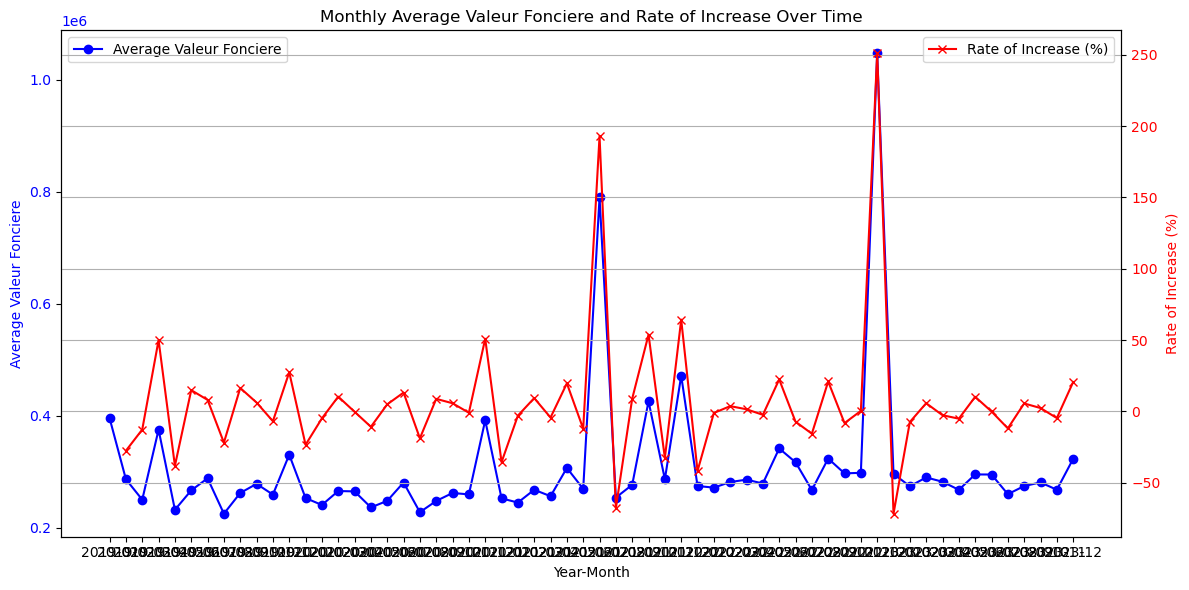

In [477]:
# Assuming 'time_data' is your DataFrame

# Step 1: Convert 'Date mutation' to datetime format
time_data['Date mutation'] = pd.to_datetime(time_data['Date mutation'], format='%d/%m/%Y')

# Step 2: Calculate the monthly average of 'Valeur fonciere'
time_data['YearMonth'] = time_data['Date mutation'].dt.to_period('M')
monthly_avg = time_data.groupby('YearMonth')['Valeur fonciere'].mean().reset_index()

# Step 3: Calculate the rate of increase
monthly_avg['Valeur fonciere'] = monthly_avg['Valeur fonciere'].astype(float)
monthly_avg['Rate of Increase'] = monthly_avg['Valeur fonciere'].pct_change() * 100

# Step 4: Plot the results with secondary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the average value on primary y-axis
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Average Valeur Fonciere', color='blue')
ax1.plot(monthly_avg['YearMonth'].astype(str), monthly_avg['Valeur fonciere'], color='blue', marker='o', label='Average Valeur Fonciere')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create secondary y-axis for rate of increase
ax2 = ax1.twinx()
ax2.set_ylabel('Rate of Increase (%)', color='red')
ax2.plot(monthly_avg['YearMonth'].astype(str), monthly_avg['Rate of Increase'], color='red', marker='x', label='Rate of Increase (%)')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Title and grid
plt.title('Monthly Average Valeur Fonciere and Rate of Increase Over Time')
fig.tight_layout()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Graph Average Value by Type

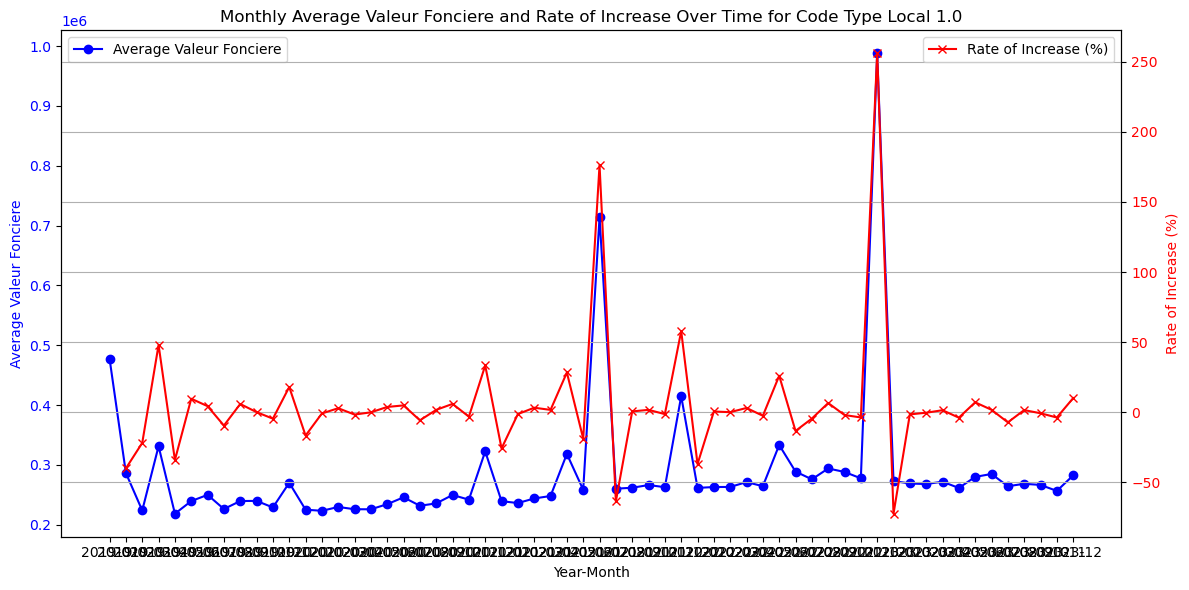

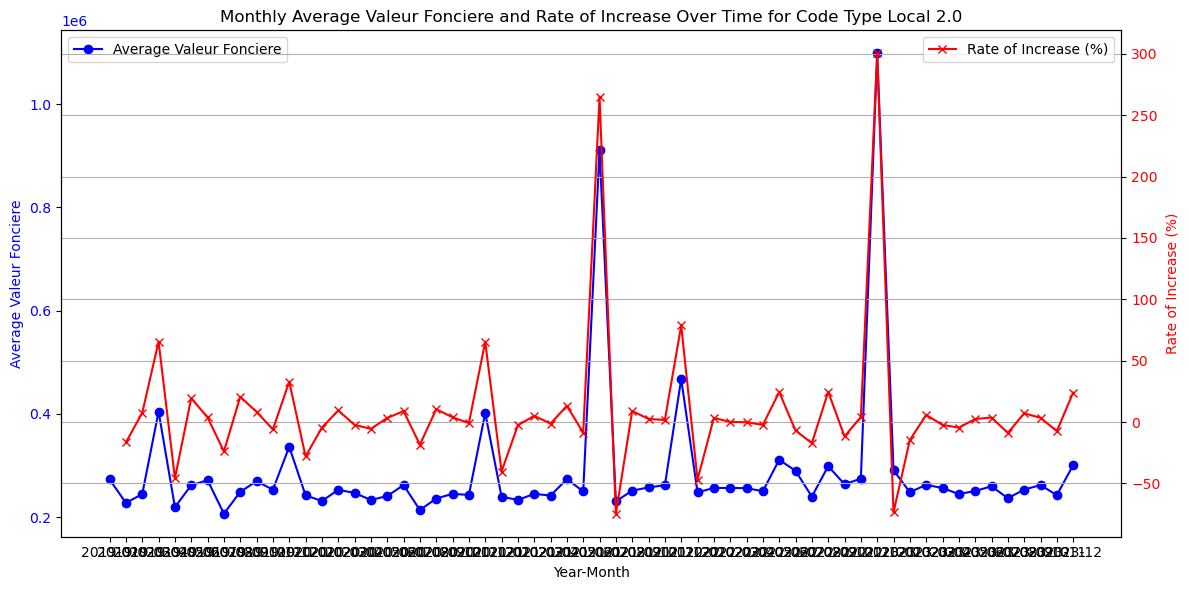

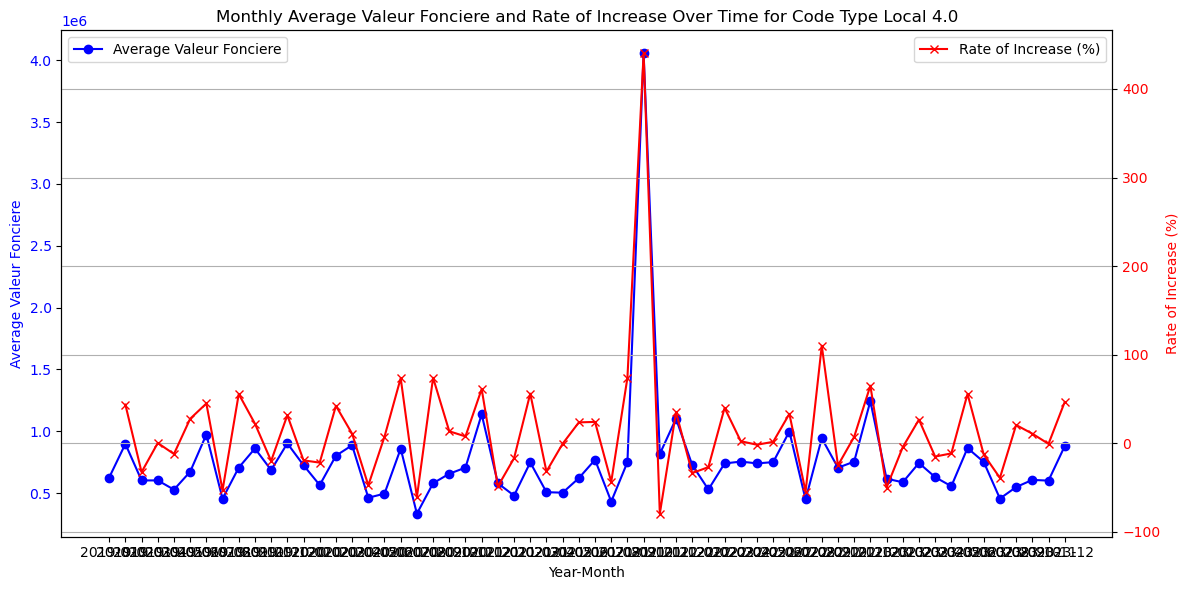

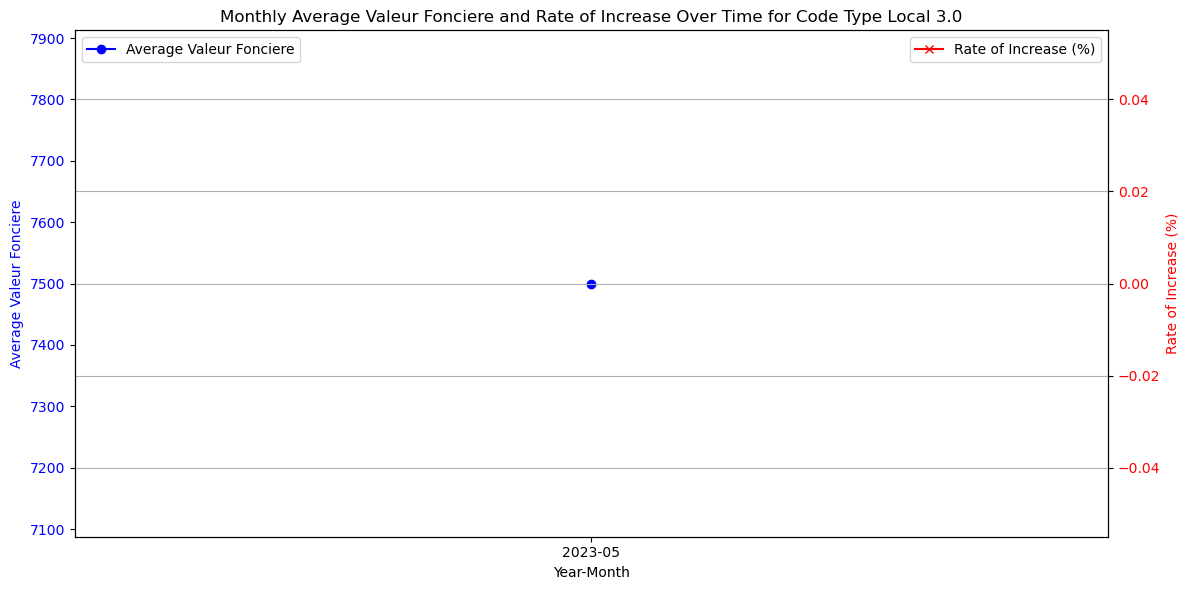

In [478]:
# Assuming 'time_data' is your DataFrame

# Convert 'Date mutation' to datetime if it's not already
time_data['Date mutation'] = pd.to_datetime(time_data['Date mutation'], format='%d/%m/%Y')

# Step 2: Calculate the monthly average of 'Valeur fonciere'
time_data['YearMonth'] = time_data['Date mutation'].dt.to_period('M')

# Loop through each unique 'Code type local'
unique_code_type_local = time_data['Code type local'].unique()

for code_type in unique_code_type_local:
    # Filter the data for the specific 'Code type local'
    filtered_data = time_data[time_data['Code type local'] == code_type]

    # Calculate the monthly average 'Valeur fonciere'
    monthly_avg = filtered_data.groupby('YearMonth')['Valeur fonciere'].mean().reset_index()

    # Calculate the rate of increase
    monthly_avg['Valeur fonciere'] = monthly_avg['Valeur fonciere'].astype(float)
    monthly_avg['Rate of Increase'] = monthly_avg['Valeur fonciere'].pct_change() * 100

    # Plot the results with secondary y-axis
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the average value on primary y-axis
    ax1.set_xlabel('Year-Month')
    ax1.set_ylabel('Average Valeur Fonciere', color='blue')
    ax1.plot(monthly_avg['YearMonth'].astype(str), monthly_avg['Valeur fonciere'], color='blue', marker='o', label='Average Valeur Fonciere')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.legend(loc='upper left')

    # Create secondary y-axis for rate of increase
    ax2 = ax1.twinx()
    ax2.set_ylabel('Rate of Increase (%)', color='red')
    ax2.plot(monthly_avg['YearMonth'].astype(str), monthly_avg['Rate of Increase'], color='red', marker='x', label='Rate of Increase (%)')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.legend(loc='upper right')

    # Title and grid
    plt.title(f'Monthly Average Valeur Fonciere and Rate of Increase Over Time for Code Type Local {code_type}')
    fig.tight_layout()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


Unique values in 'Code type local': [1. 2. 4. 3.]
Code Type Local: 1.0
Mean Absolute Error: 219935.76290628596
Model Coefficients: [9.35141708e+07 9.07539745e+04]


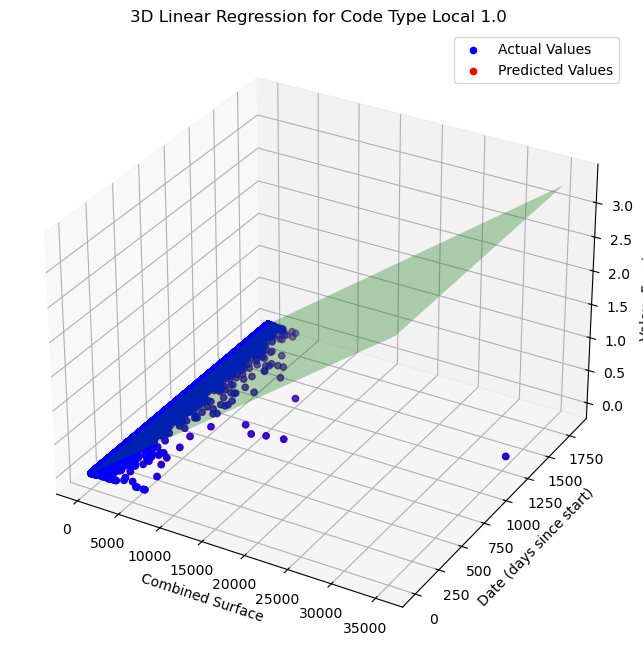

Code Type Local: 2.0
Mean Absolute Error: 222860.0518289977
Model Coefficients: [2.90794188e+08 9.32215843e+04]


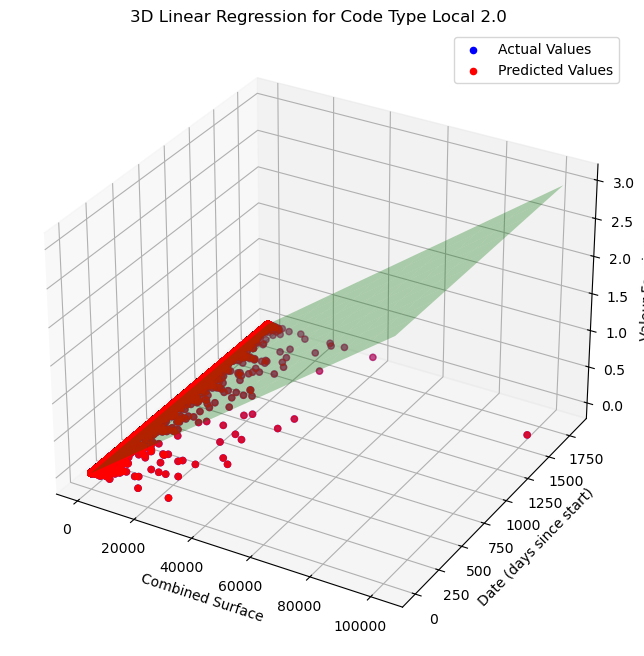

Code Type Local: 4.0
Mean Absolute Error: 860310.7580172783
Model Coefficients: [1.40056367e+08 1.42223652e+05]


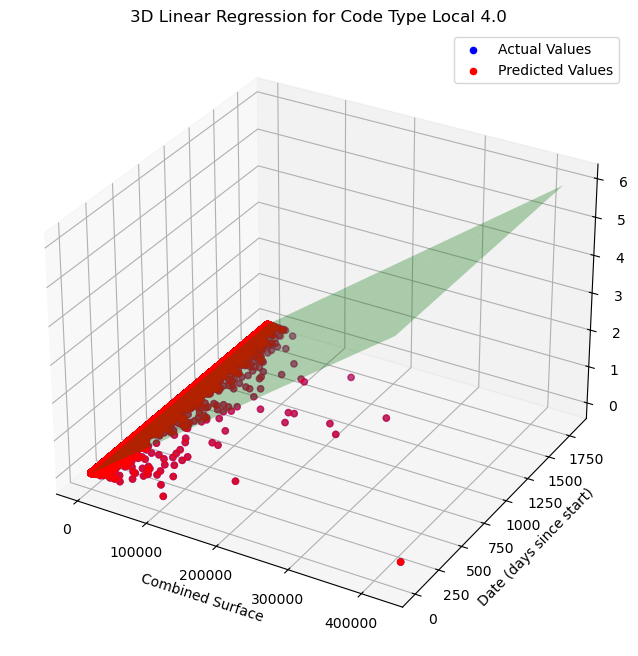

ValueError: With n_samples=1, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [479]:
# Convert 'Date mutation' to datetime
time_data['Date mutation'] = pd.to_datetime(time_data['Date mutation'], format='%d/%m/%Y')

# Convert 'Date mutation' to numerical value (days since start)
time_data['Date_numeric'] = (time_data['Date mutation'] - time_data['Date mutation'].min()).dt.days

# Check unique values in 'Code type local' column
unique_code_type_local = time_data['Code type local'].unique()
print("Unique values in 'Code type local':", unique_code_type_local)

# Dictionary to store models
models = {}

# Loop through each unique 'Code type local' and create a 3D plot
for specific_code_type_local in unique_code_type_local:
    # Filter the data for the specific Code type local
    filtered_data = time_data[time_data['Code type local'] == specific_code_type_local]

    # Check if filtered data has enough samples for splitting
    if len(filtered_data) < 2:
        print(f"Not enough data points for Code type local: {specific_code_type_local}")
        continue

    # Split the data into training and testing sets
    X = filtered_data[['Surface_combined', 'Date_numeric']]
    y = filtered_data['Valeur fonciere']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Store the model in the dictionary
    models[specific_code_type_local] = model

    # Predict values
    y_pred = model.predict(X_test_scaled)

    # Calculate Mean absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Code Type Local: {specific_code_type_local}")
    print("Mean Absolute Error:", mae)
    print("Model Coefficients:", model.coef_)

    # Plotting the results in 3D
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test['Surface_combined'], X_test['Date_numeric'], y_test, color='blue', label='Actual Values')
    ax.scatter(X_test['Surface_combined'], X_test['Date_numeric'], y_pred, color='red', label='Predicted Values')

    # Plot the regression plane
    xx, yy = np.meshgrid(np.linspace(X_test['Surface_combined'].min(), X_test['Surface_combined'].max(), 10), 
                         np.linspace(X_test['Date_numeric'].min(), X_test['Date_numeric'].max(), 10))
    zz = model.coef_[0] * xx + model.coef_[1] * yy + model.intercept_
    ax.plot_surface(xx, yy, zz, color='green', alpha=0.3)

    ax.set_xlabel('Combined Surface')
    ax.set_ylabel('Date (days since start)')
    ax.set_zlabel('Valeur Fonciere')
    ax.set_title(f'3D Linear Regression for Code Type Local {specific_code_type_local}')
    plt.legend()
    plt.show()


# Function to predict values using the stored models
def predict_value(code_type_local, surface_combined, date_mutation):
    if code_type_local not in models:
        print(f"No model found for Code type local: {code_type_local}")
        return None
    model = models[code_type_local]
    date_mutation = pd.to_datetime(date_mutation, format='%d/%m/%Y')
    date_numeric = (date_mutation - time_data['Date mutation'].min()).days
    prediction = model.predict([[surface_combined, date_numeric]])
    return prediction[0]

# Example usage of the prediction function
example_code_type_local = unique_code_type_local[0]
example_surface_combined = 1000.0
example_date_mutation = '15/09/2023'
predicted_value = predict_value(example_code_type_local, example_surface_combined, example_date_mutation)
if predicted_value is not None:
    print(f"Predicted Valeur Fonciere for Code type local {example_code_type_local} with Combined Surface {example_surface_combined} and Date Mutation {example_date_mutation}: {predicted_value}")


Unique values in 'Code type local': [1. 2. 3. 4.]
Code Type Local: 1.0
Mean Squared Error: 9053316746686.434
Model Coefficients: [46.33412608 12.02676759]

Code Type Local: 2.0
Mean Squared Error: 85508759177764.02
Model Coefficients: [169.97883228  37.66592348]

Code Type Local: 3.0
Mean Squared Error: 4887237469292.094
Model Coefficients: [ 20.52386785 -15.37599099]

Code Type Local: 4.0
Mean Squared Error: 1943463840373050.5
Model Coefficients: [101.06599295 102.67763483]

Model of Valeur vs Surface for all departement

Unique values in 'Code departement': ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '31'
 '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44' '45'
 '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '58' '59' '60'
 '61' '62' '63' '64' '65' '66' '69' '70' '71' '72' '73' '74' '75' '76'
 '77' '78' '79' '80' '81' '82' '83' '84' '85' '86' '87' '88' '89' '90'
 '91' '92' '93' '94' '95' '971' '972' '973' '974' '2A' '2B']
Code Departement: 1
Mean Absolute Error: 152181.28431168976
Model Coefficients: [3318419.36066499]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


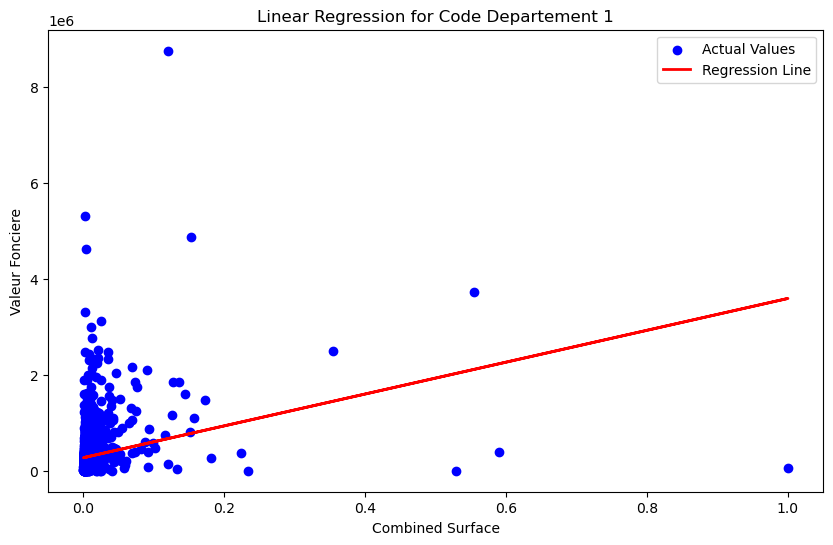

Code Departement: 2
Mean Absolute Error: 70144.96767742287
Model Coefficients: [23353677.76293168]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


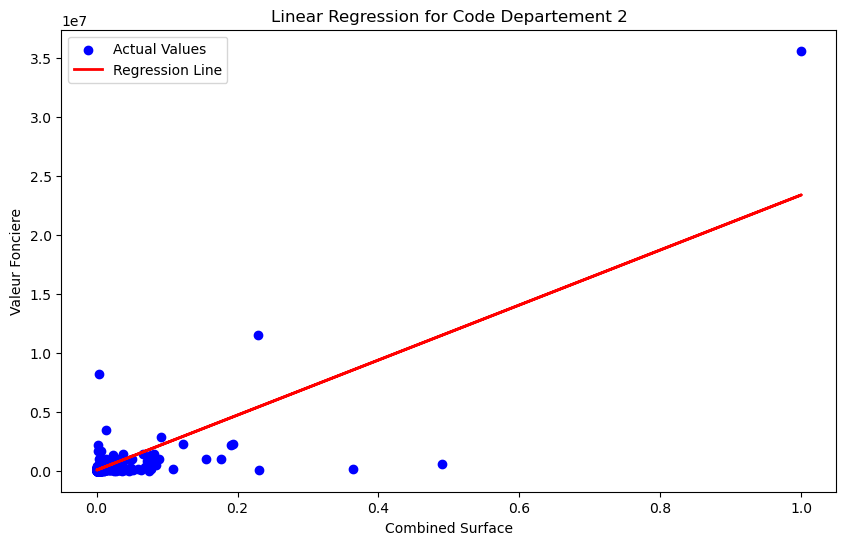

Code Departement: 3
Mean Absolute Error: 75029.72887598365
Model Coefficients: [1147258.20951886]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


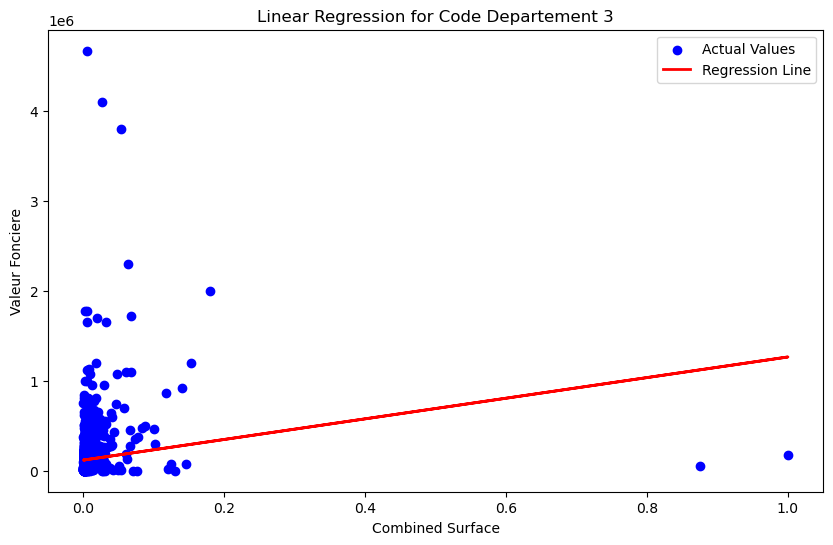

Code Departement: 4
Mean Absolute Error: 106160.10602992393
Model Coefficients: [1960006.43018946]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


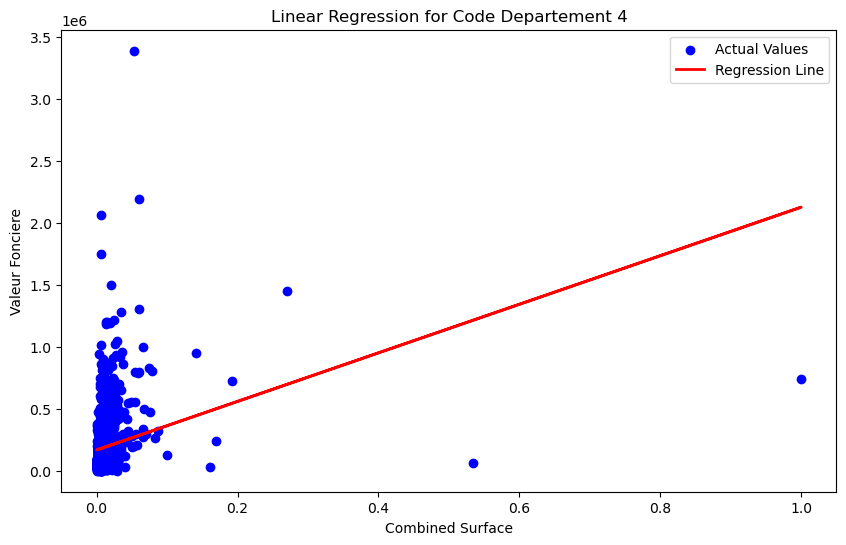

Code Departement: 5
Mean Absolute Error: 132226.27333706556
Model Coefficients: [1290412.75784475]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


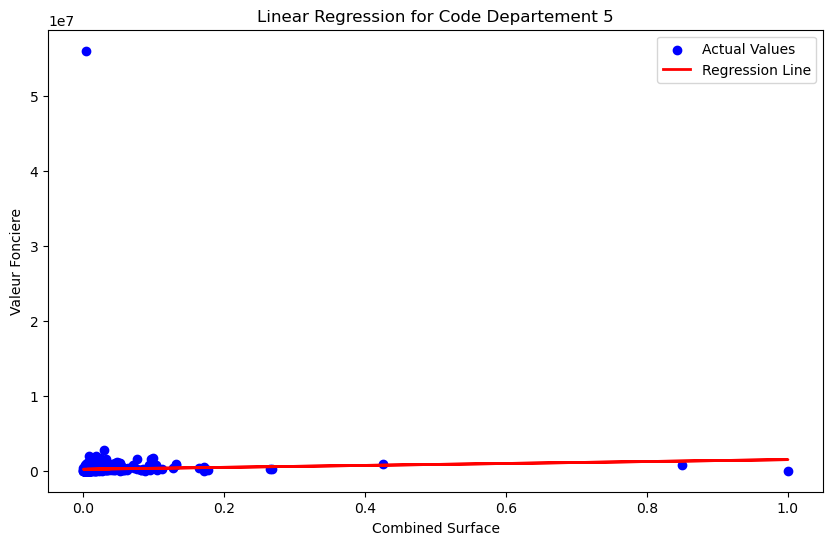

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 6
Mean Absolute Error: 257723.19702544846
Model Coefficients: [33616187.33005852]


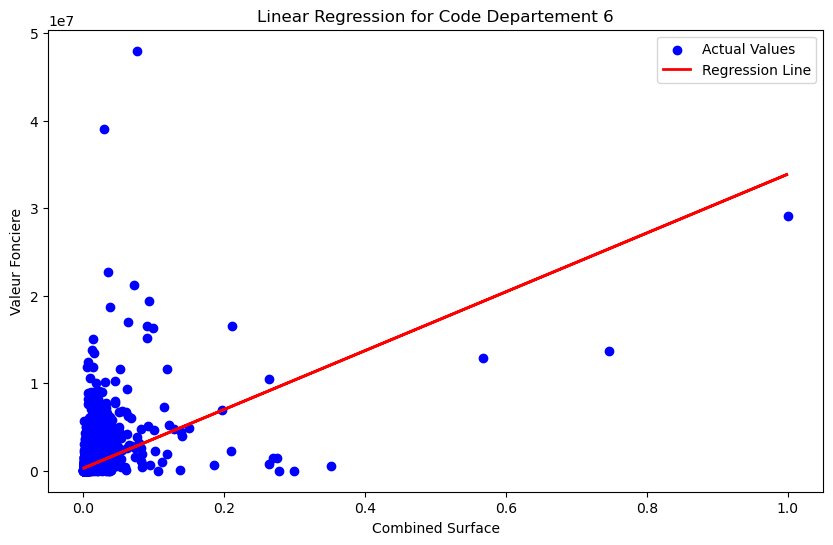

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 7
Mean Absolute Error: 102481.69390649935
Model Coefficients: [840798.5792992]


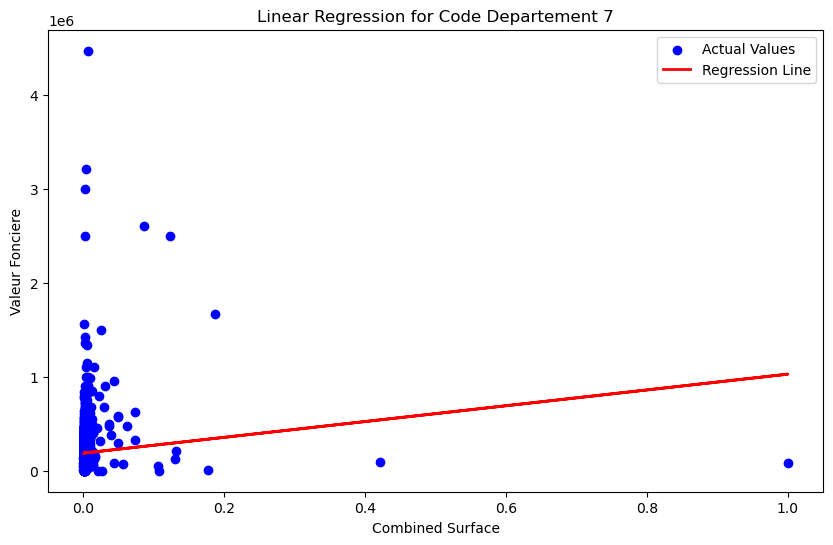

Code Departement: 8
Mean Absolute Error: 73107.15801249683
Model Coefficients: [2473059.73734248]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


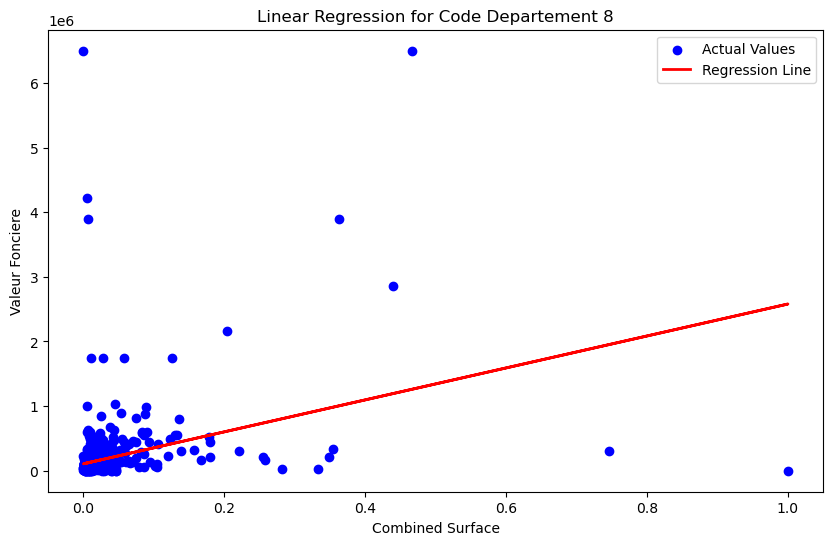

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 9
Mean Absolute Error: 77299.83817025559
Model Coefficients: [2728421.95081389]


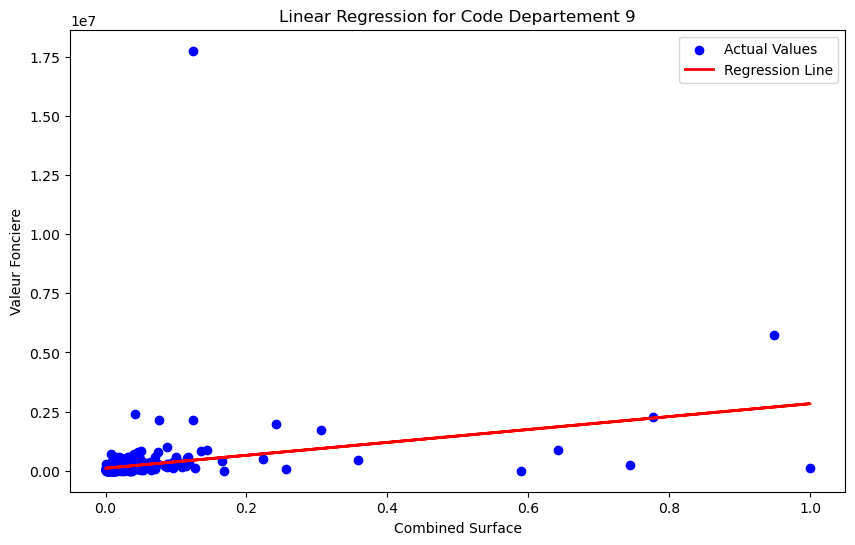

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 10
Mean Absolute Error: 80831.37736434455
Model Coefficients: [5279695.62836841]


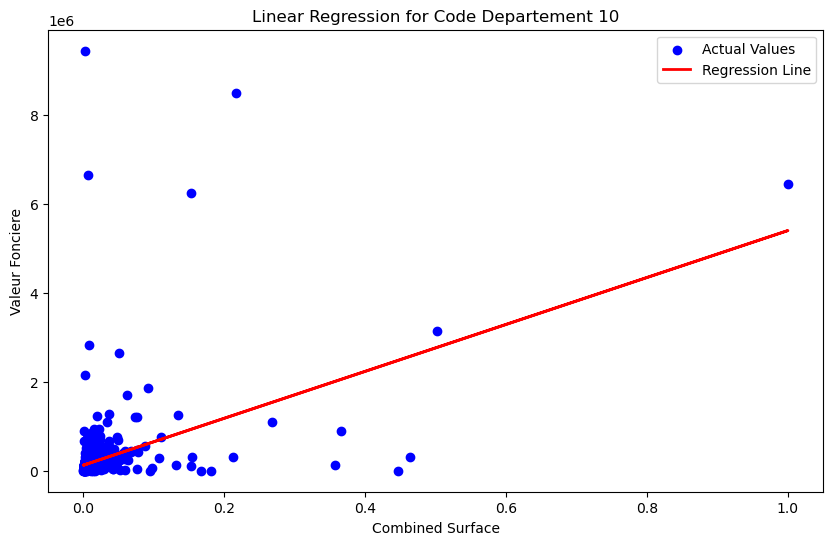

Code Departement: 11
Mean Absolute Error: 85578.73371473432
Model Coefficients: [6700688.42465467]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


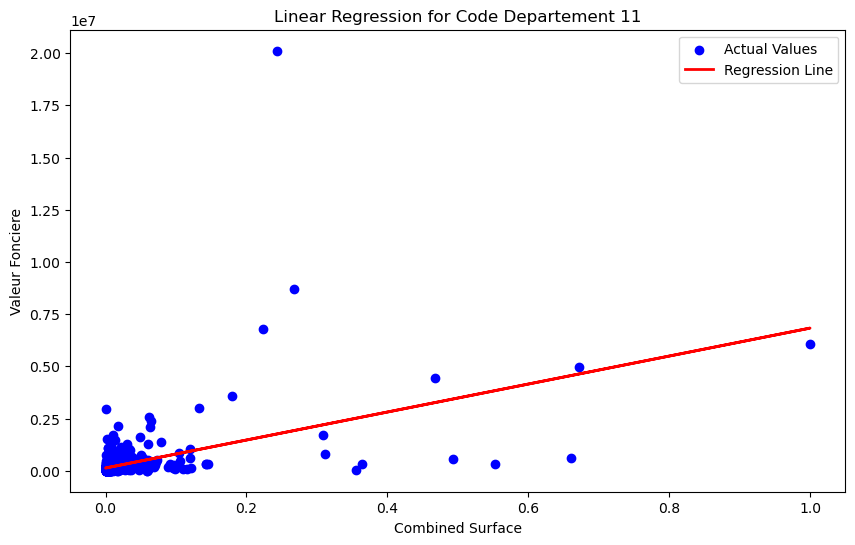

Code Departement: 12
Mean Absolute Error: 79488.3530167353
Model Coefficients: [1283304.40943737]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


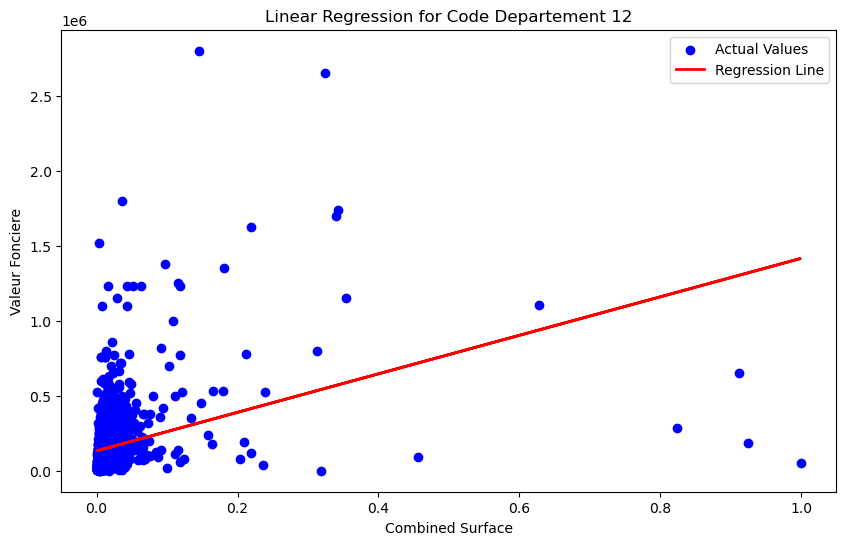

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 13
Mean Absolute Error: 208360.7085011144
Model Coefficients: [41868093.69764718]


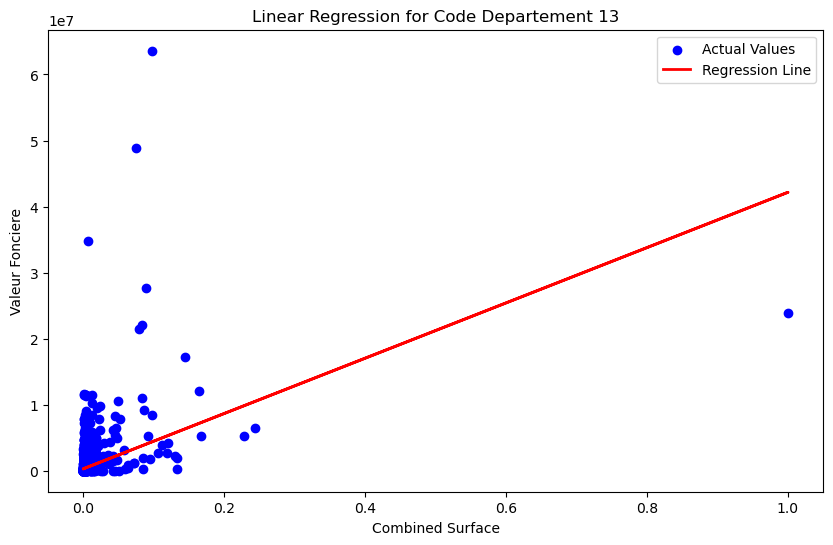

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 14
Mean Absolute Error: 136148.49534703957
Model Coefficients: [14161859.21657632]


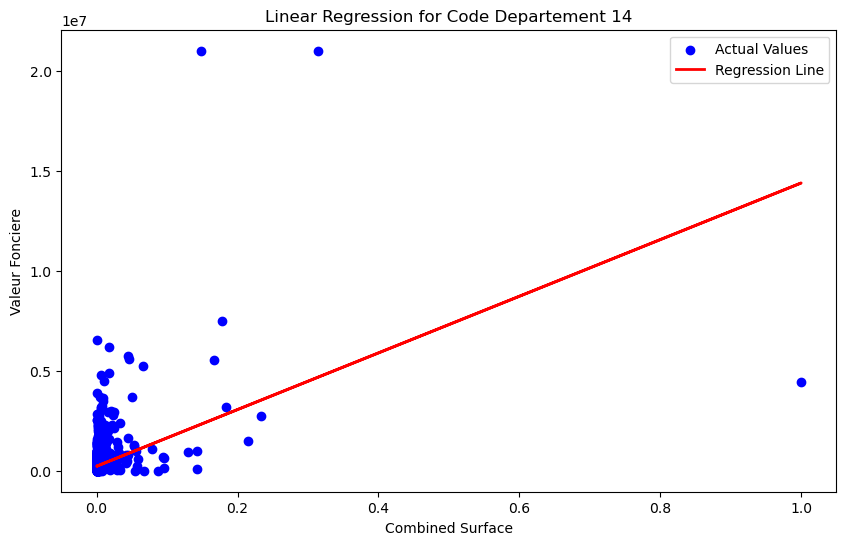

Code Departement: 15
Mean Absolute Error: 66120.23246803416
Model Coefficients: [1643302.12087393]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


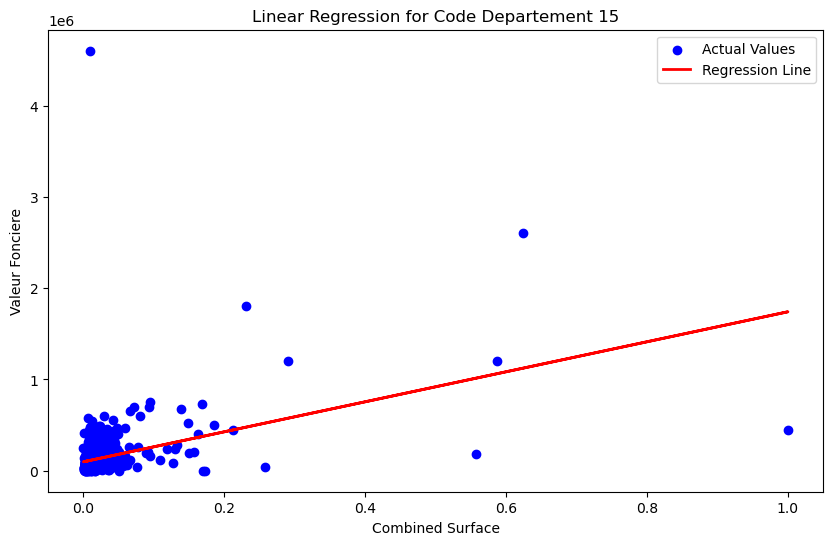

Code Departement: 16
Mean Absolute Error: 80951.79698761499
Model Coefficients: [1518734.51200438]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


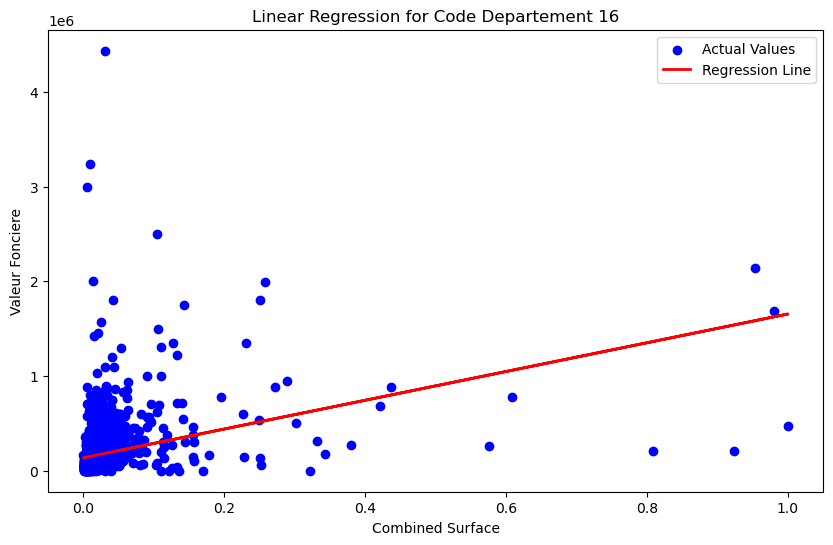

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 17
Mean Absolute Error: 162043.45423684403
Model Coefficients: [18297644.55041918]


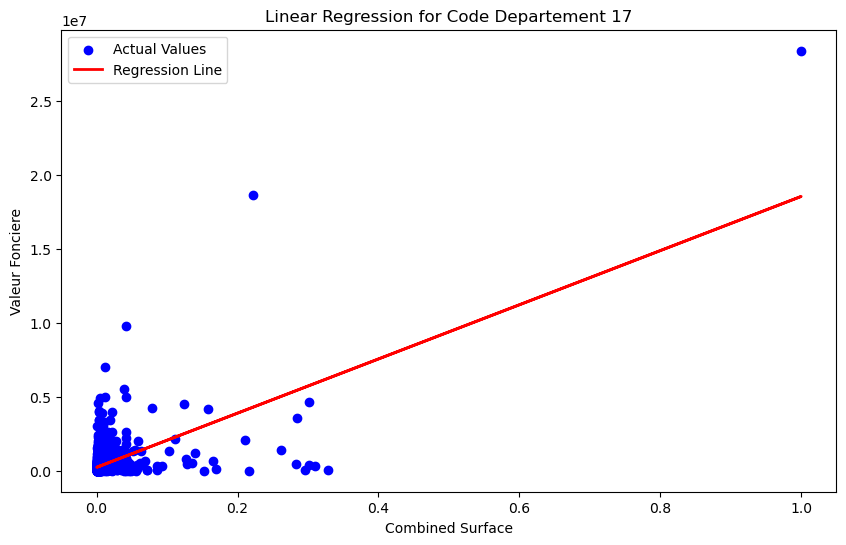

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 18
Mean Absolute Error: 73987.40115726295
Model Coefficients: [5277768.74414512]


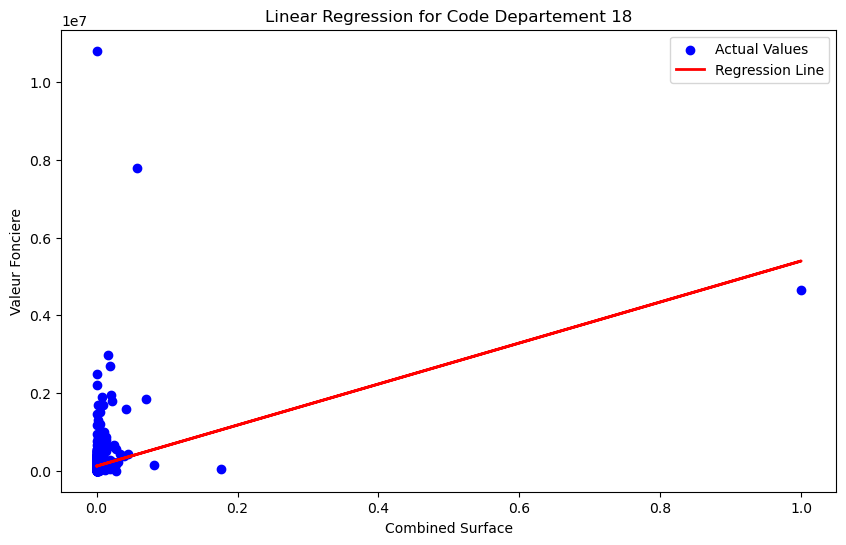

Code Departement: 19
Mean Absolute Error: 72340.90053183032
Model Coefficients: [2099922.74621213]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


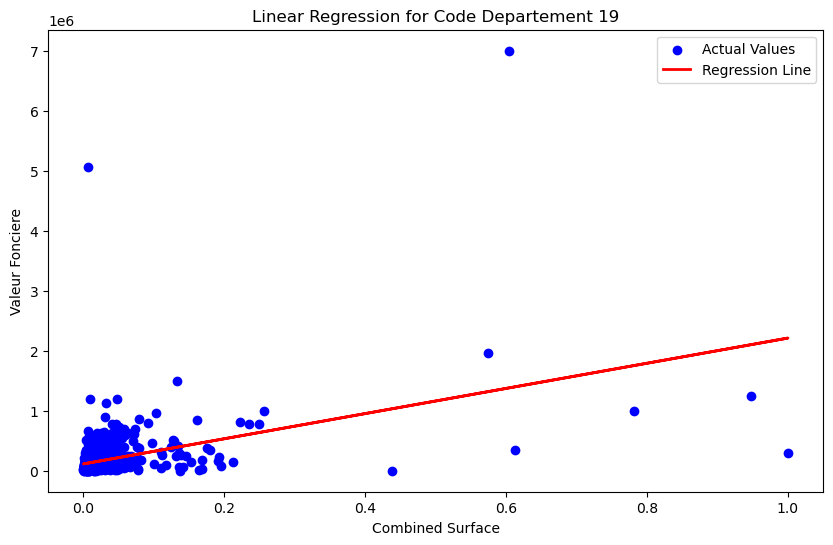

Code Departement: 21
Mean Absolute Error: 123727.62043390945
Model Coefficients: [6549815.84919019]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


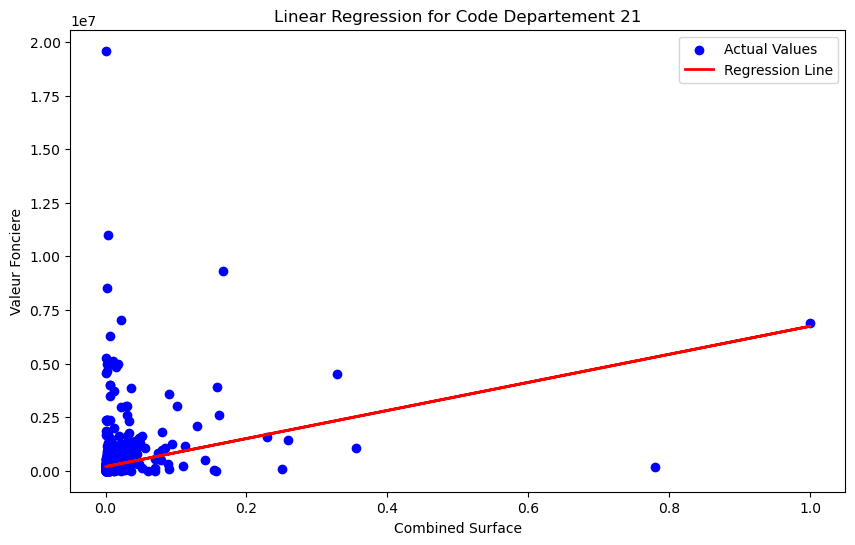

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 22
Mean Absolute Error: 106874.27621453215
Model Coefficients: [7137548.66467739]


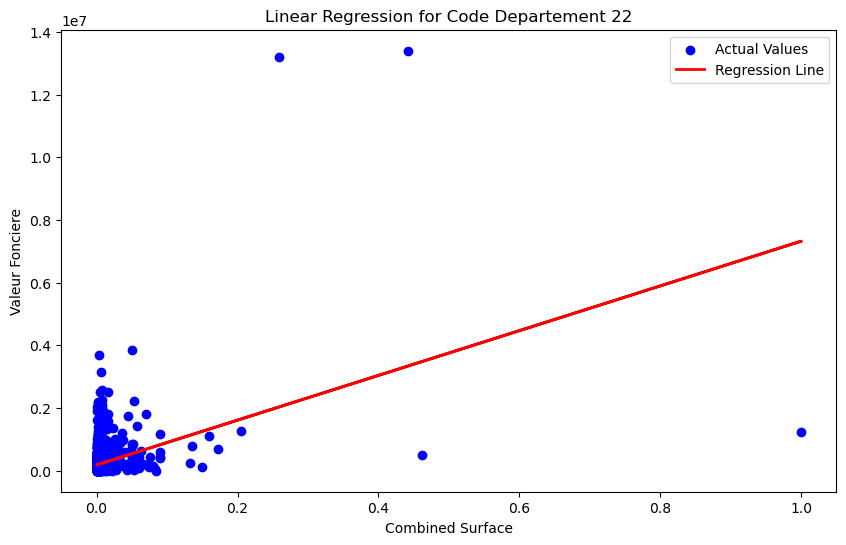

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 23
Mean Absolute Error: 55749.91115562166
Model Coefficients: [443628.61799924]


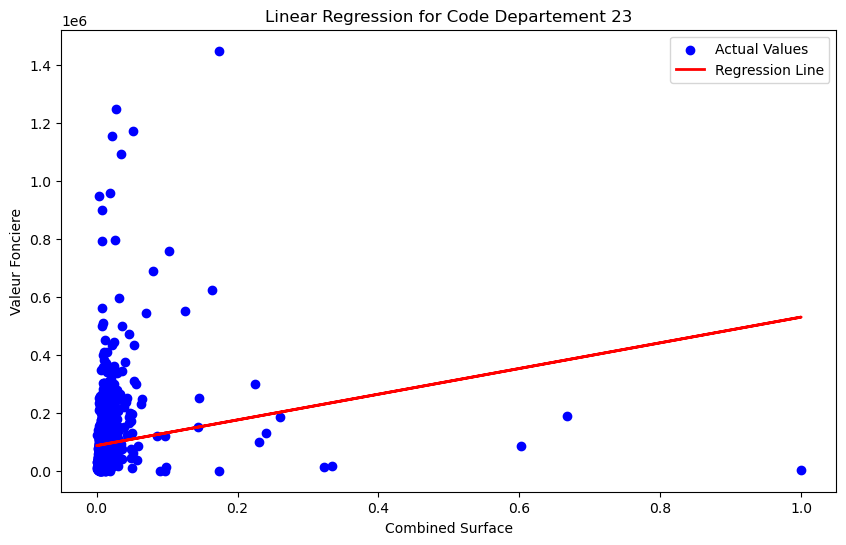

Code Departement: 24
Mean Absolute Error: 101832.88964804592
Model Coefficients: [3474697.55989958]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


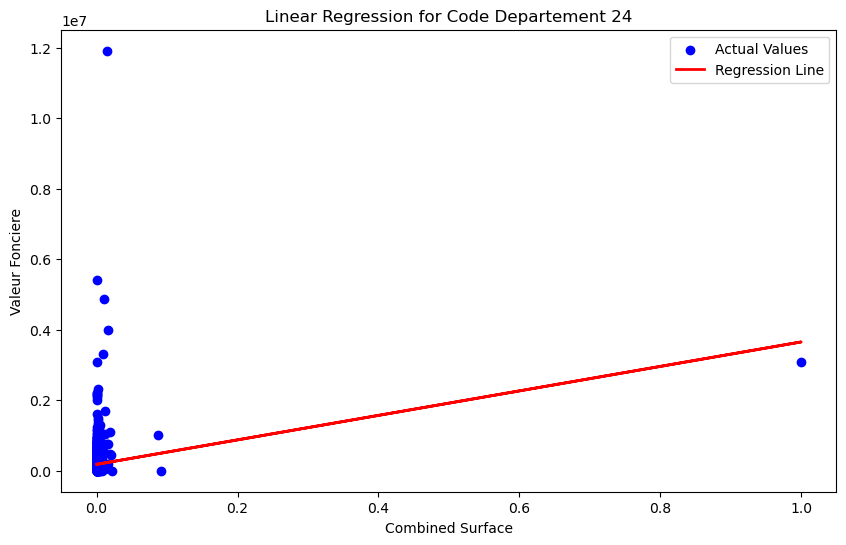

Code Departement: 25
Mean Absolute Error: 102031.24861705012
Model Coefficients: [3279905.16653596]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


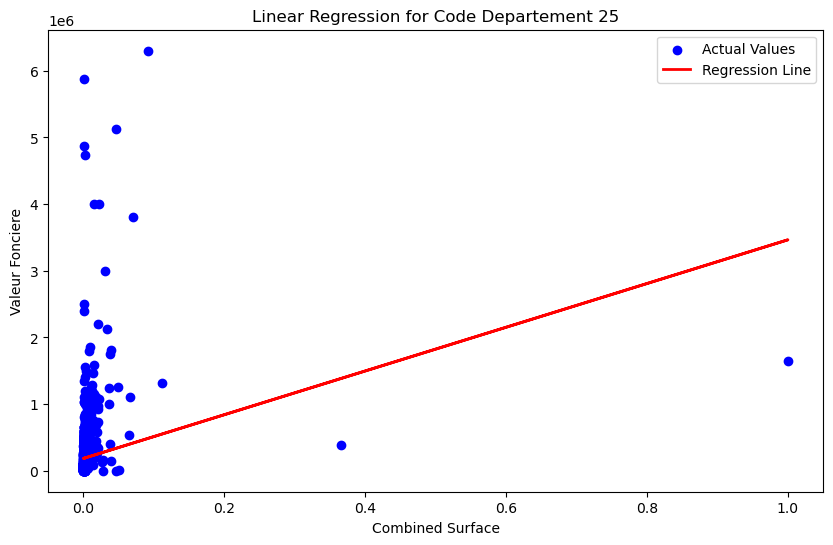

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 26
Mean Absolute Error: 107832.0879840361
Model Coefficients: [11177528.26721126]


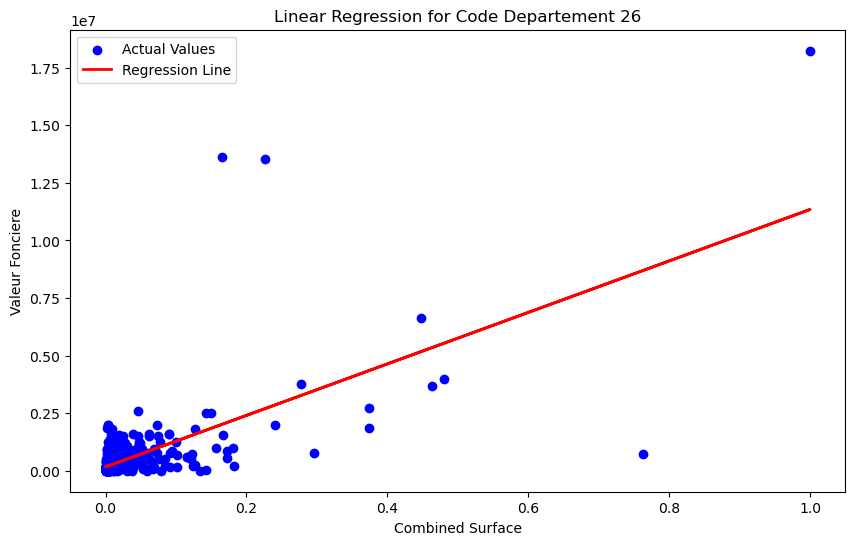

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 27
Mean Absolute Error: 84139.2506990074
Model Coefficients: [4945825.46276953]


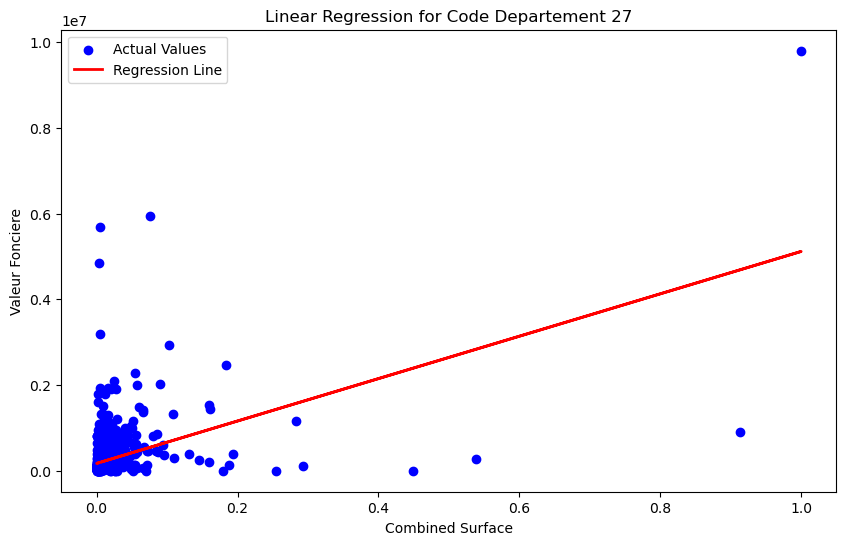

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 28
Mean Absolute Error: 90785.41632838658
Model Coefficients: [2879439.17685509]


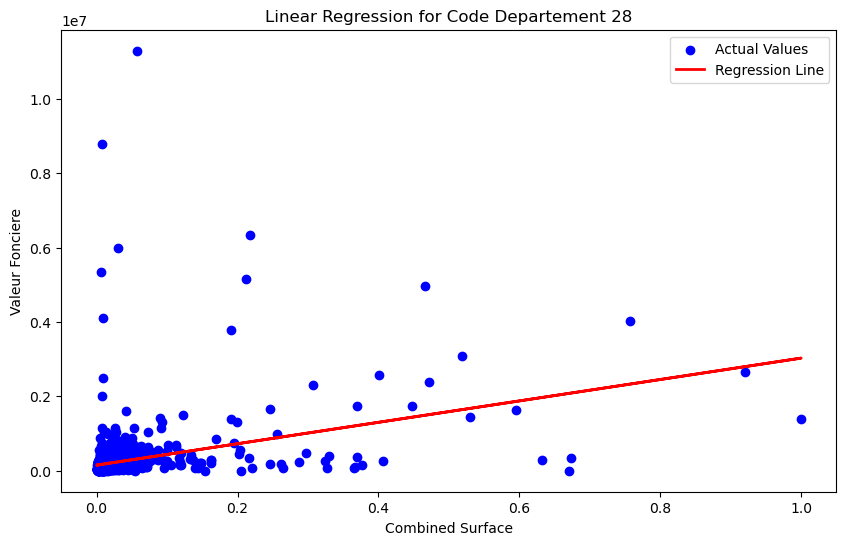

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 29
Mean Absolute Error: 104342.04942718148
Model Coefficients: [3197906.42062715]


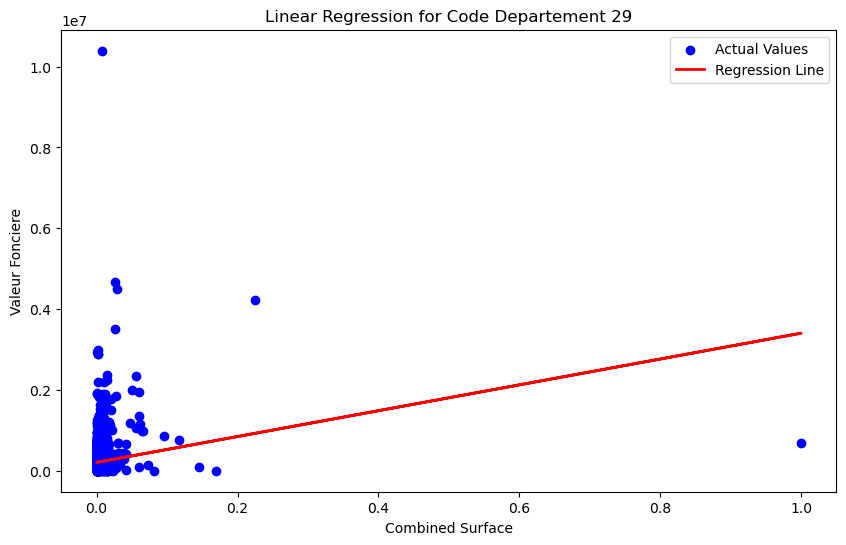

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 30
Mean Absolute Error: 136369.34648084905
Model Coefficients: [8657257.78473824]


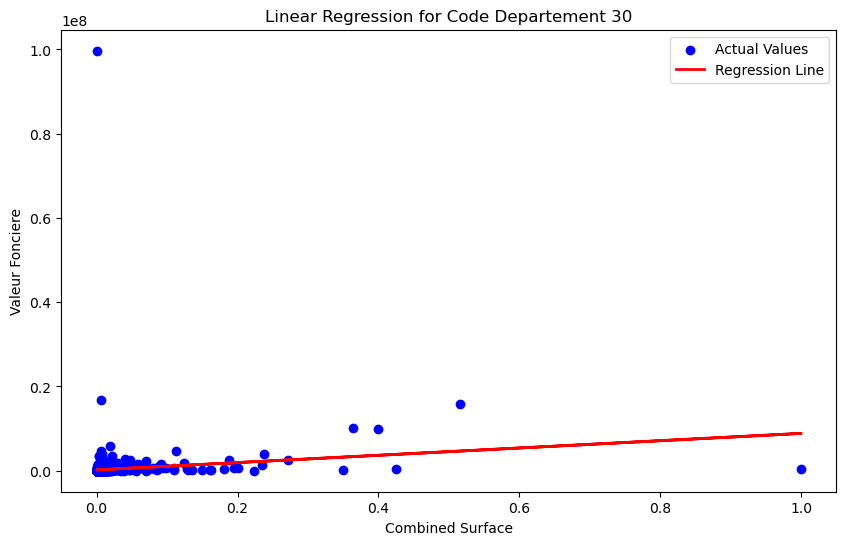

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 31
Mean Absolute Error: 130710.5576129142
Model Coefficients: [10278789.34969575]


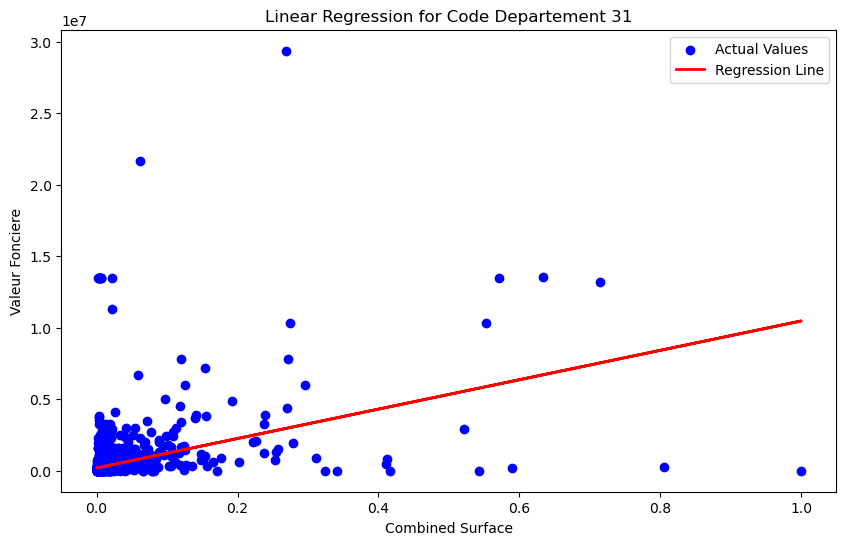

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 32
Mean Absolute Error: 86830.58819269369
Model Coefficients: [1720631.68518265]


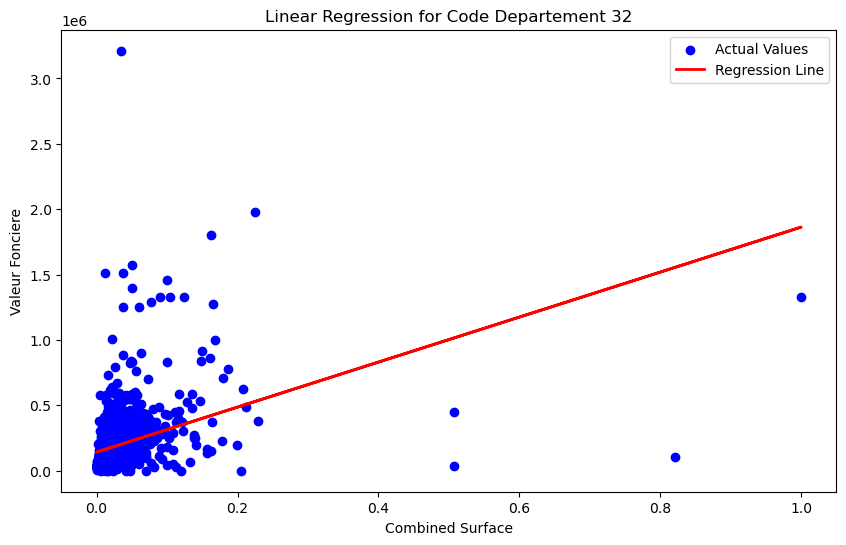

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 33
Mean Absolute Error: 222074.47736398602
Model Coefficients: [17717786.20321412]


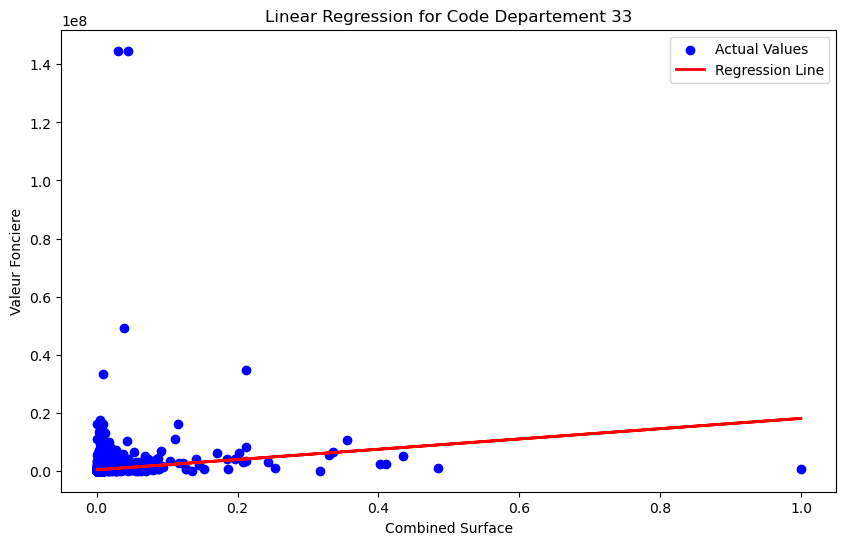

Code Departement: 34
Mean Absolute Error: 128340.9034869179
Model Coefficients: [16730544.00979858]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


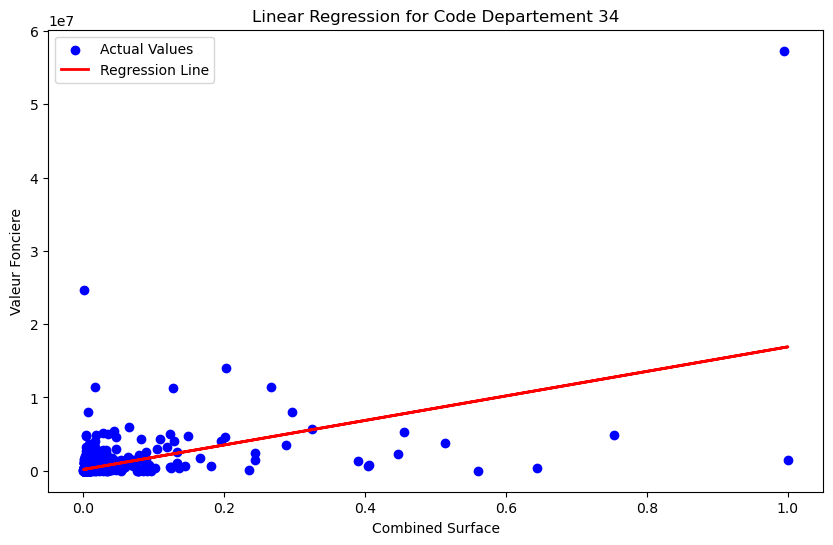

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 35
Mean Absolute Error: 139608.55085178578
Model Coefficients: [5782910.9975653]


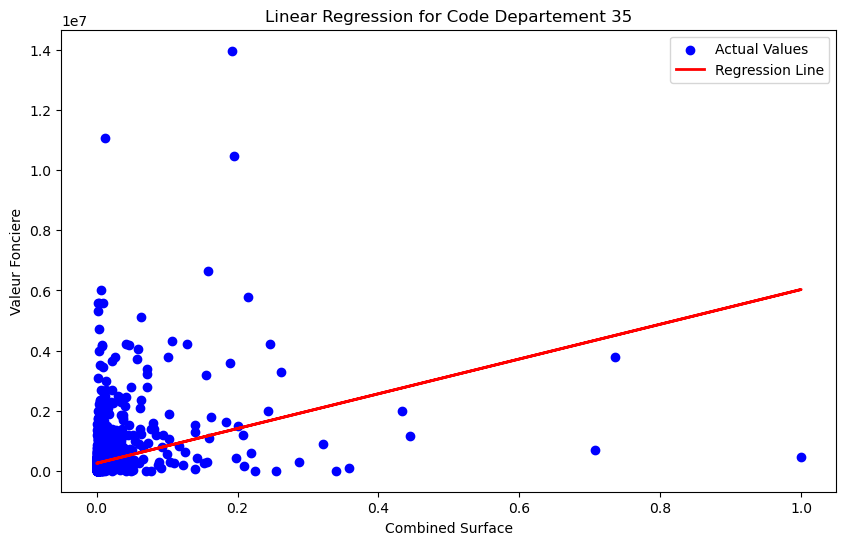

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 36
Mean Absolute Error: 65159.403284553686
Model Coefficients: [1731885.95146751]


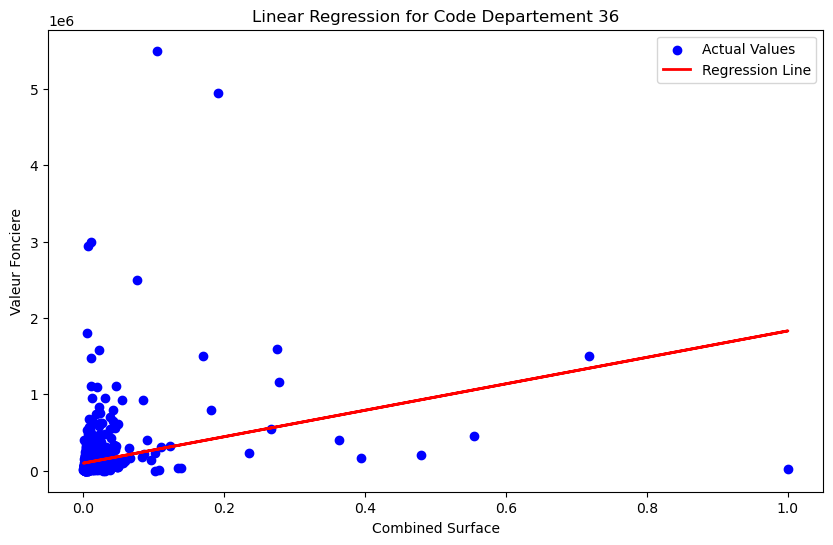

Code Departement: 37
Mean Absolute Error: 111161.36917471023
Model Coefficients: [3680604.04010622]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


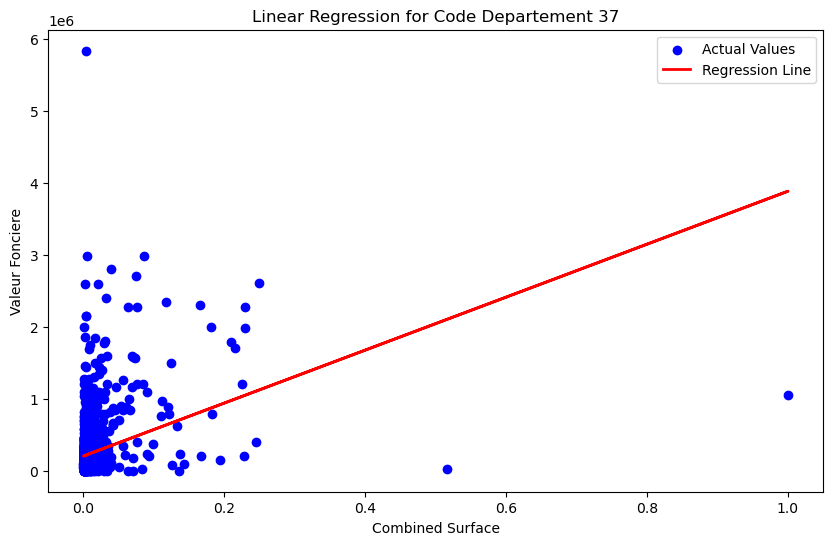

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 38
Mean Absolute Error: 123025.1235663164
Model Coefficients: [17900934.92837361]


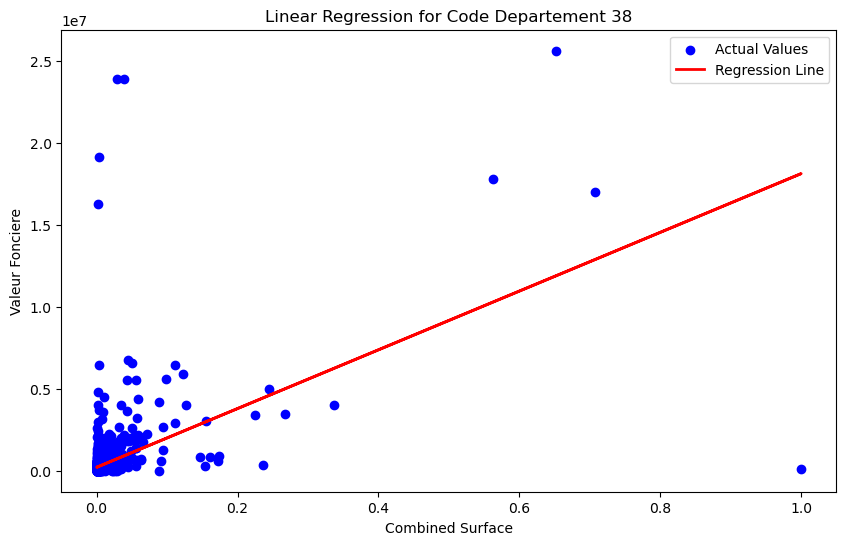

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 39
Mean Absolute Error: 87876.15382896205
Model Coefficients: [6195460.85135243]


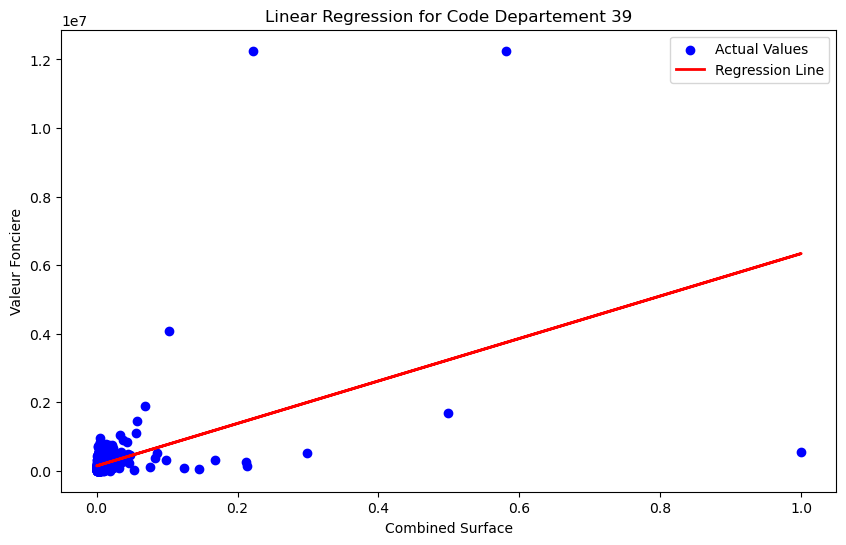

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 40
Mean Absolute Error: 154436.74342733878
Model Coefficients: [2431315.88996532]


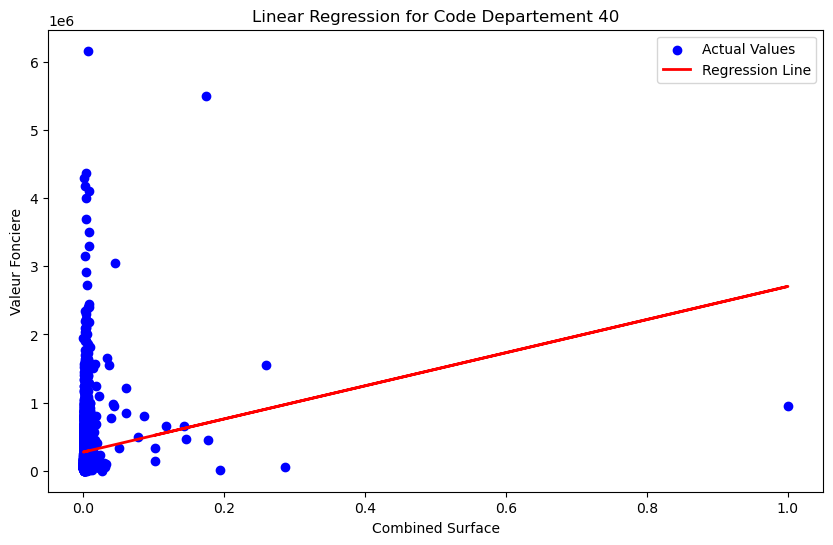

Code Departement: 41
Mean Absolute Error: 93796.71917751175
Model Coefficients: [4370865.80929512]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


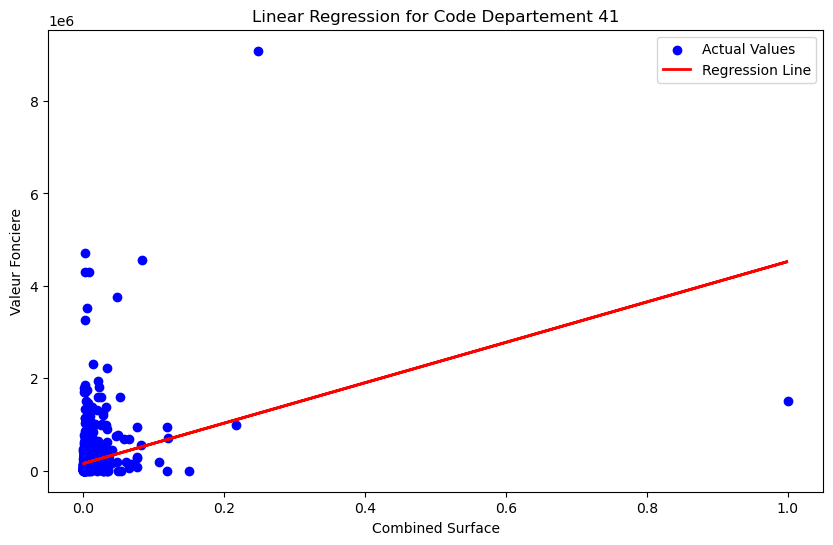

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 42
Mean Absolute Error: 94495.30246819092
Model Coefficients: [9120525.71511433]


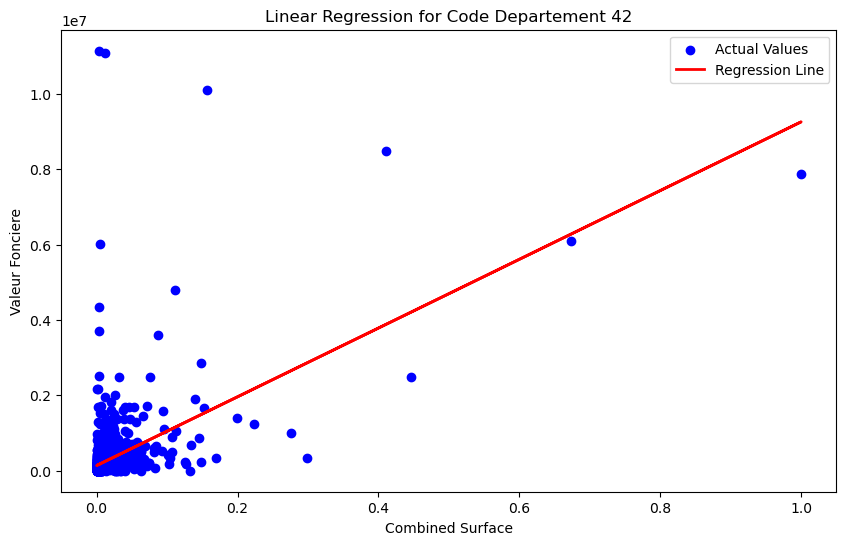

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 43
Mean Absolute Error: 72691.71713058722
Model Coefficients: [2883684.17277493]


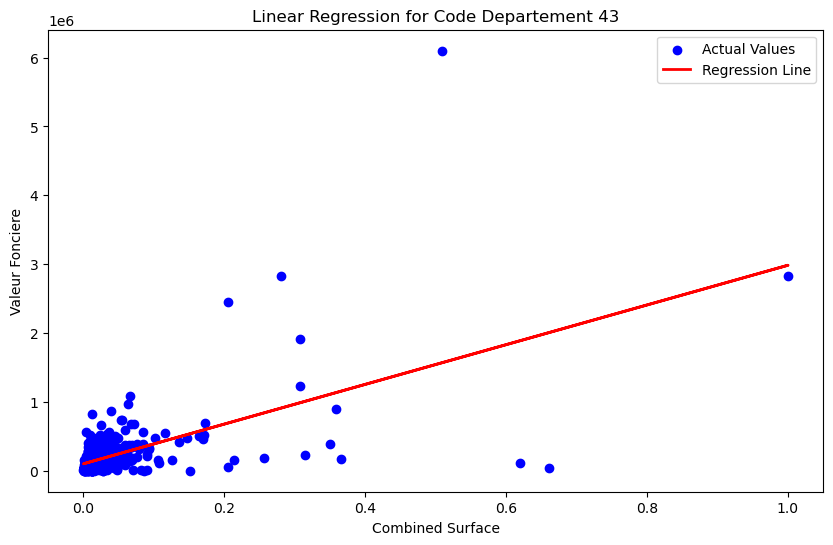

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 44
Mean Absolute Error: 162805.35331373697
Model Coefficients: [14655945.04722209]


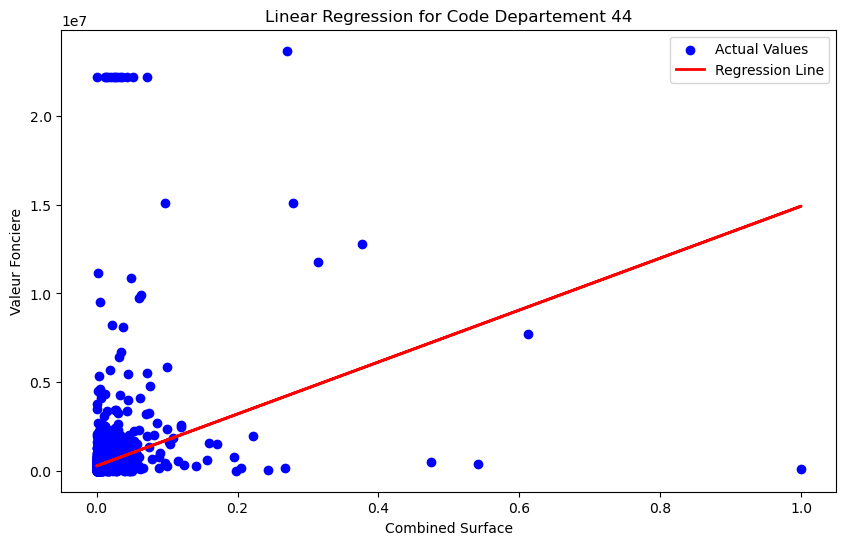

Code Departement: 45
Mean Absolute Error: 99555.51229398132
Model Coefficients: [6536203.04591526]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


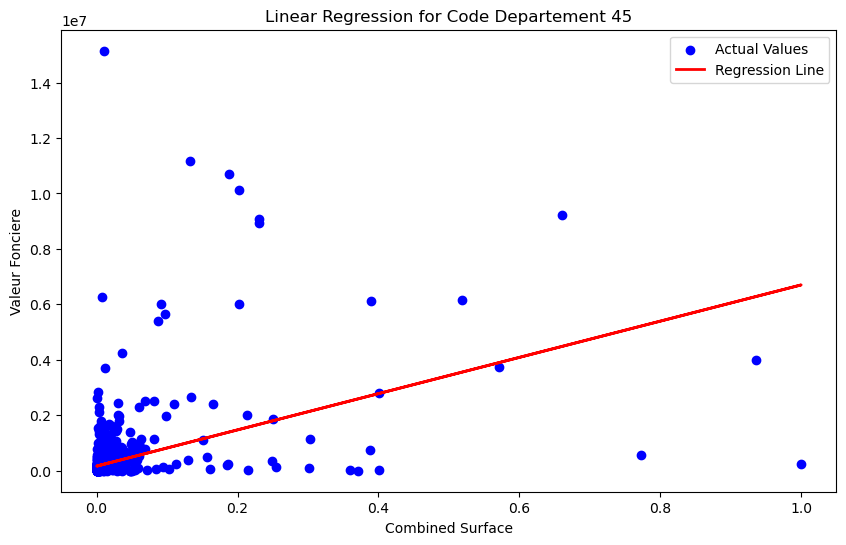

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 46
Mean Absolute Error: 96842.65964837956
Model Coefficients: [1094958.00158735]


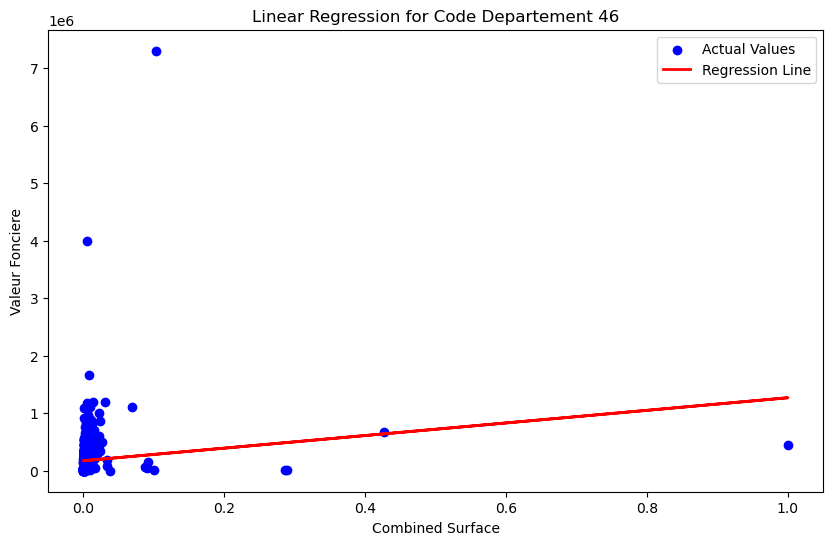

Code Departement: 47
Mean Absolute Error: 91452.65303349552
Model Coefficients: [6544864.6254488]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


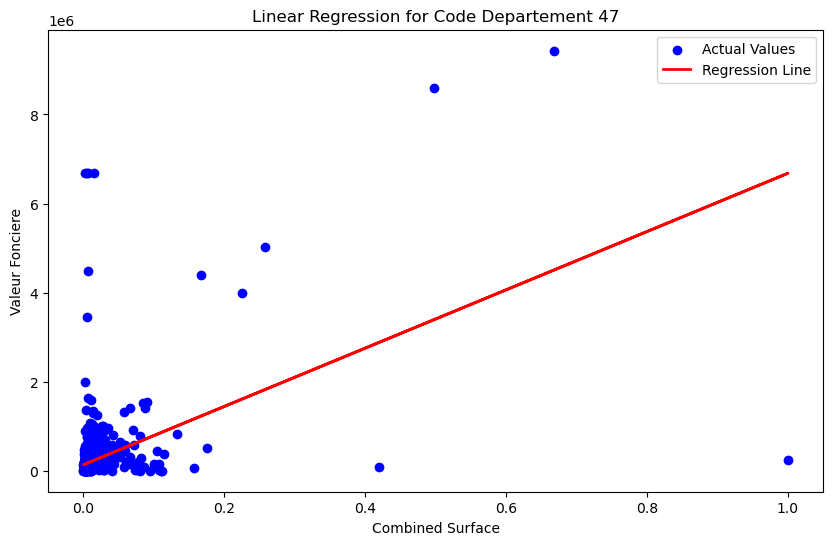

Code Departement: 48
Mean Absolute Error: 73656.31182297306
Model Coefficients: [639796.0204088]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


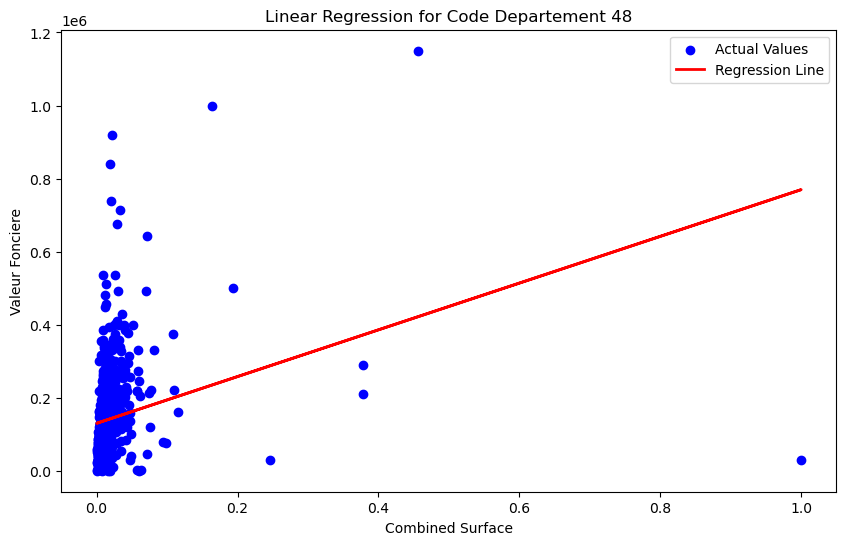

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 49
Mean Absolute Error: 106599.07678040017
Model Coefficients: [4290491.21989589]


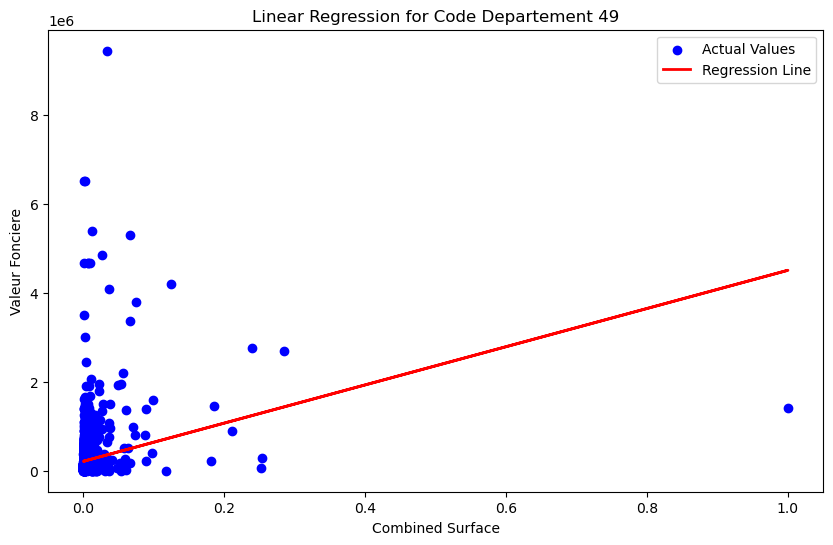

Code Departement: 50
Mean Absolute Error: 105426.00305988184
Model Coefficients: [11965522.4721112]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


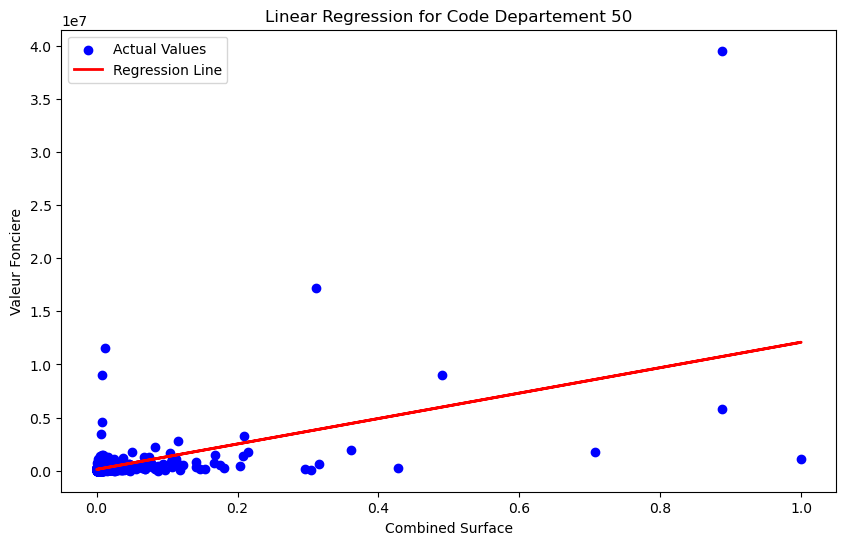

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 51
Mean Absolute Error: 105549.58780575747
Model Coefficients: [4804835.14899612]


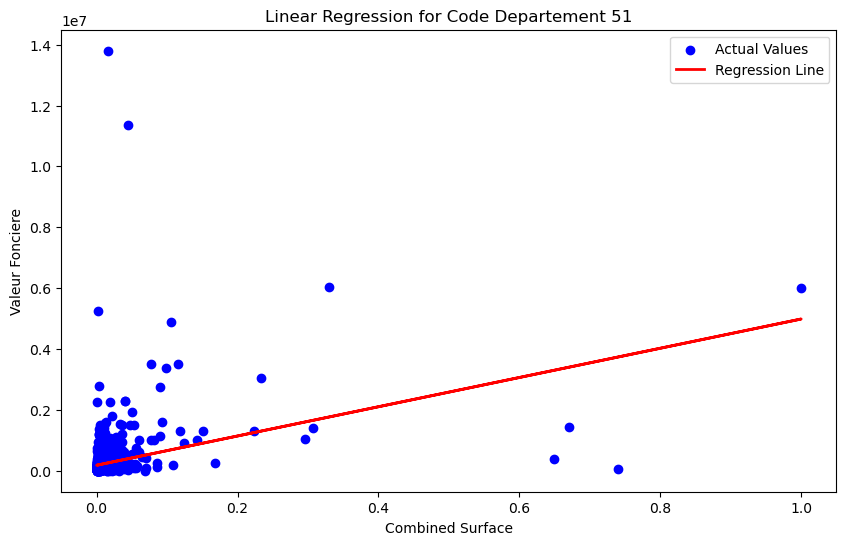

Code Departement: 52
Mean Absolute Error: 72298.3856041666
Model Coefficients: [4637470.89598959]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


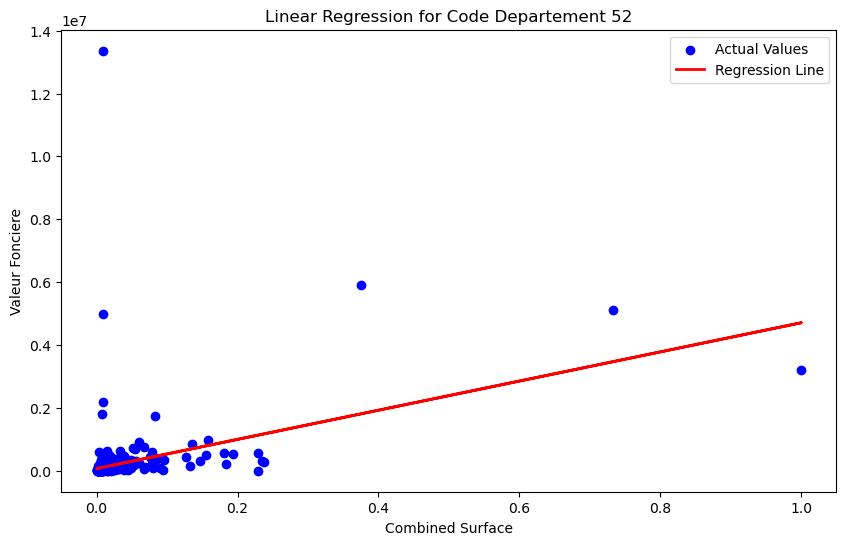

Code Departement: 53
Mean Absolute Error: 71646.83850049748
Model Coefficients: [1810592.6683494]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


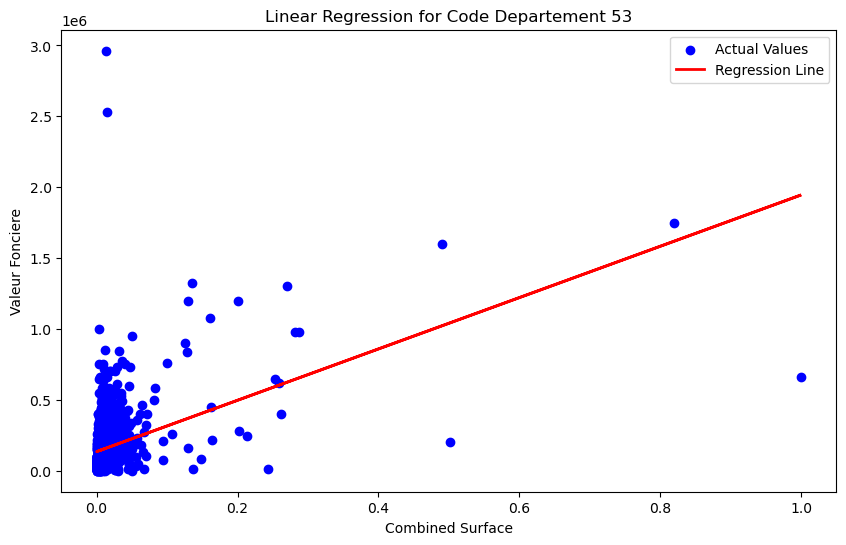

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 54
Mean Absolute Error: 125661.76918644726
Model Coefficients: [8917873.58188316]


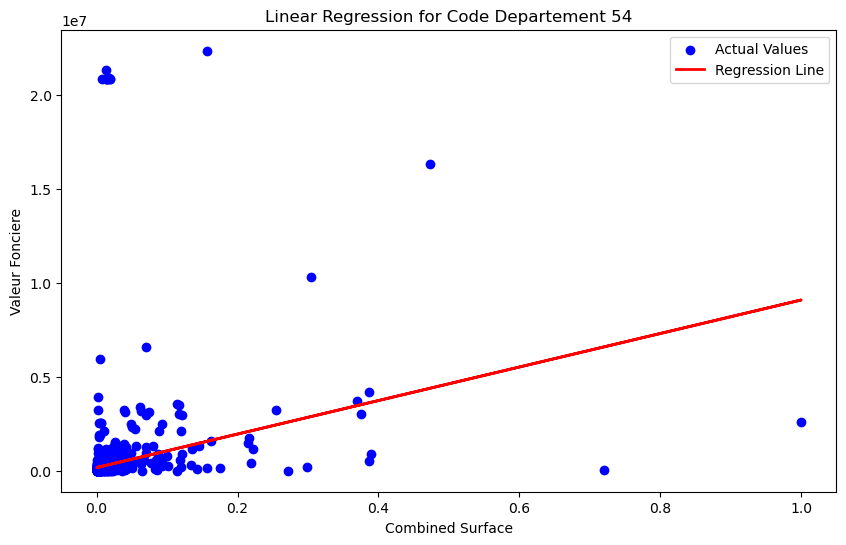

Code Departement: 55
Mean Absolute Error: 86354.39257129915
Model Coefficients: [2602680.36218095]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


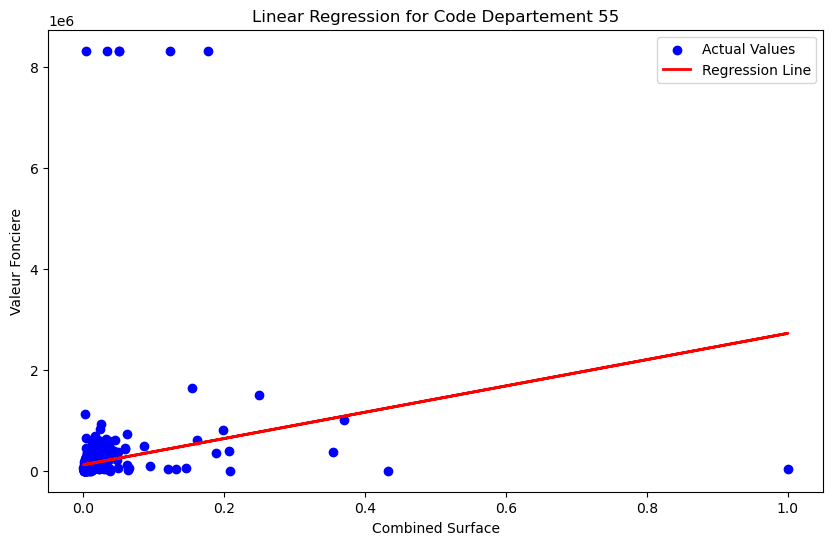

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 56
Mean Absolute Error: 151556.12818504206
Model Coefficients: [3068956.29981574]


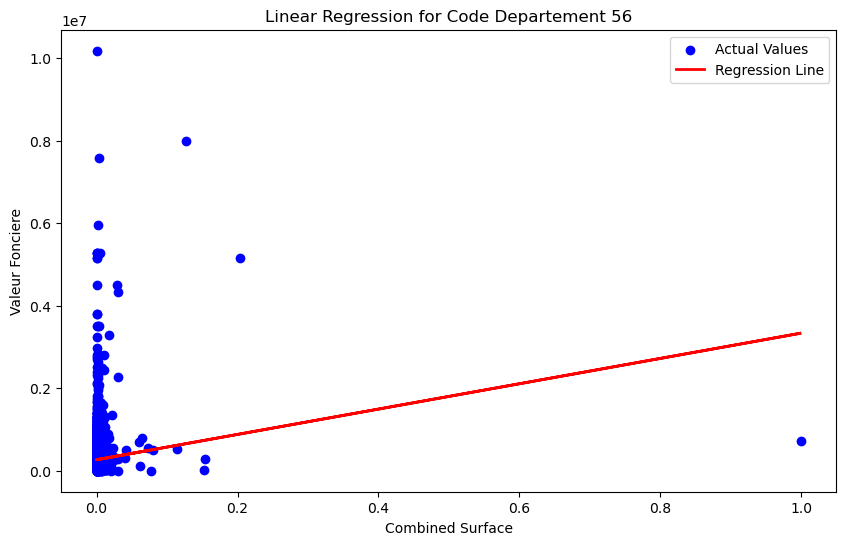

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 58
Mean Absolute Error: 59710.15822034113
Model Coefficients: [2922071.71204825]


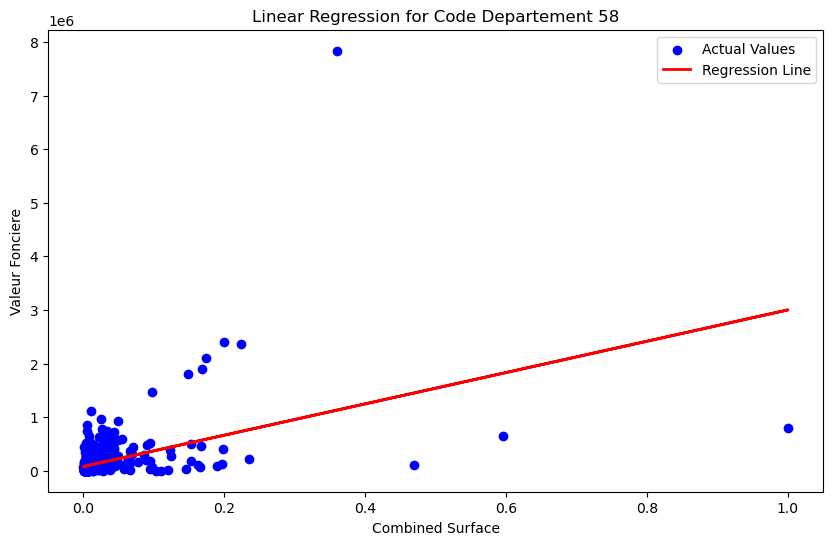

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 59
Mean Absolute Error: 132650.06452387455
Model Coefficients: [16712044.01875783]


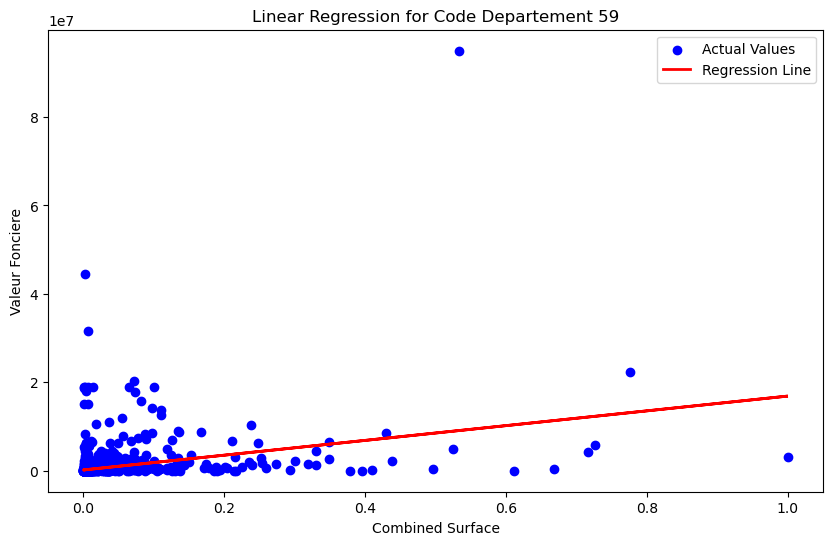

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 60
Mean Absolute Error: 117608.76801403218
Model Coefficients: [30017243.13155984]


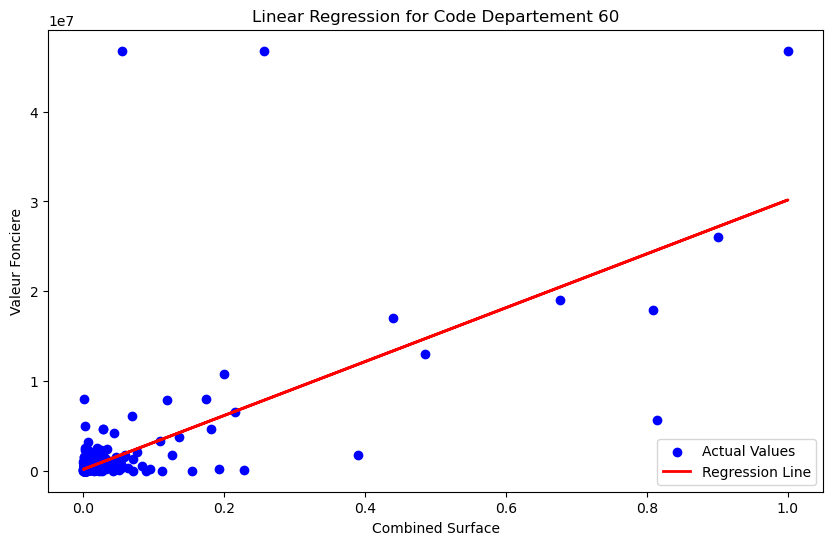

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 61
Mean Absolute Error: 145590.655945257
Model Coefficients: [2113869.66926223]


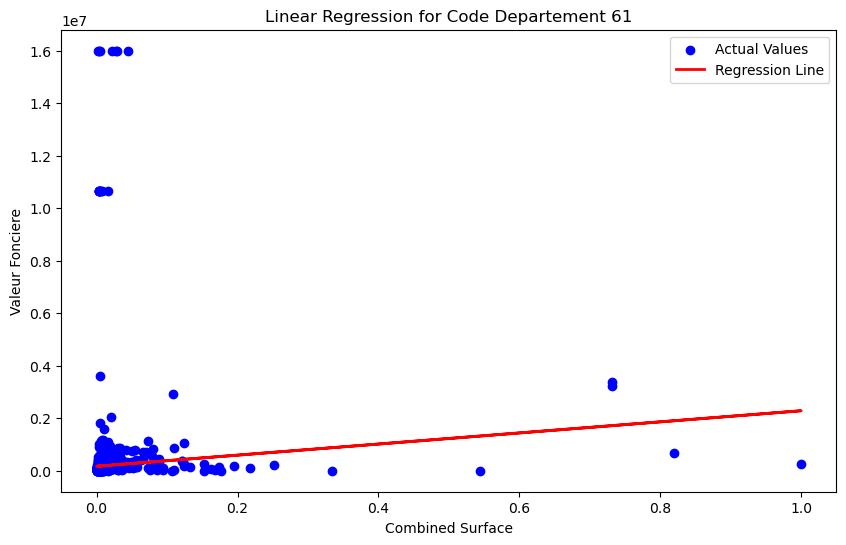

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 62
Mean Absolute Error: 132840.62603733045
Model Coefficients: [22613135.59037805]


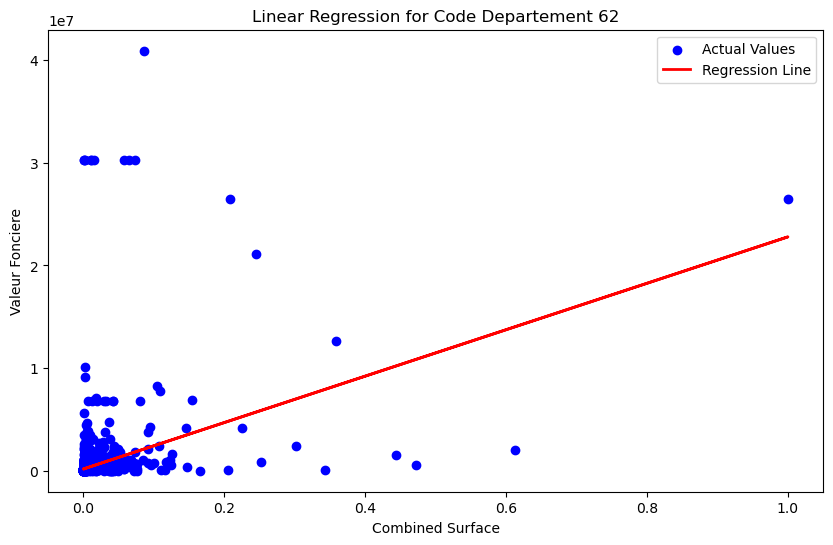

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 63
Mean Absolute Error: 99803.43123185034
Model Coefficients: [4559418.68973226]


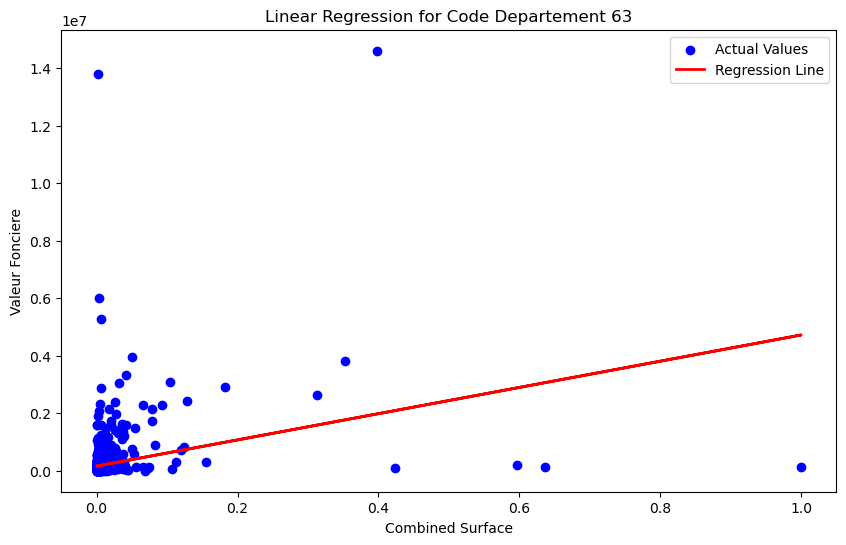

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 64
Mean Absolute Error: 184844.37103830473
Model Coefficients: [8473774.08930029]


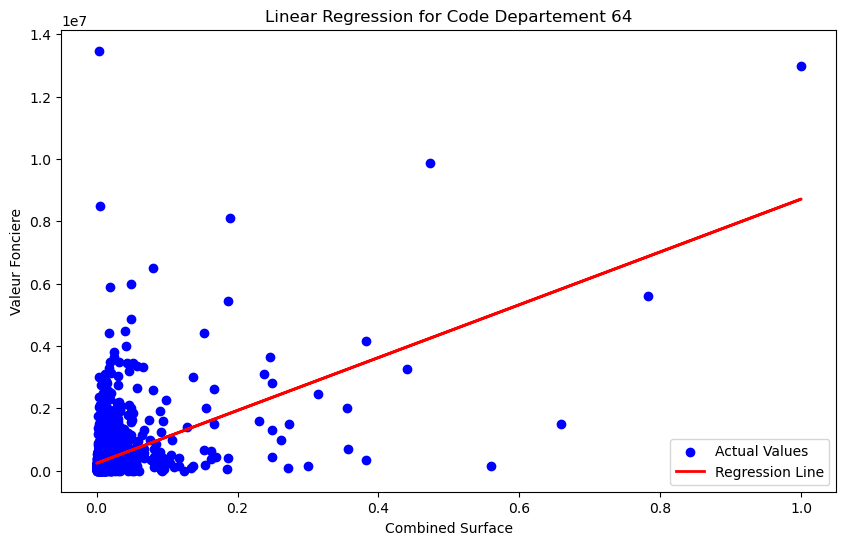

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 65
Mean Absolute Error: 103834.48819646829
Model Coefficients: [2703010.6374308]


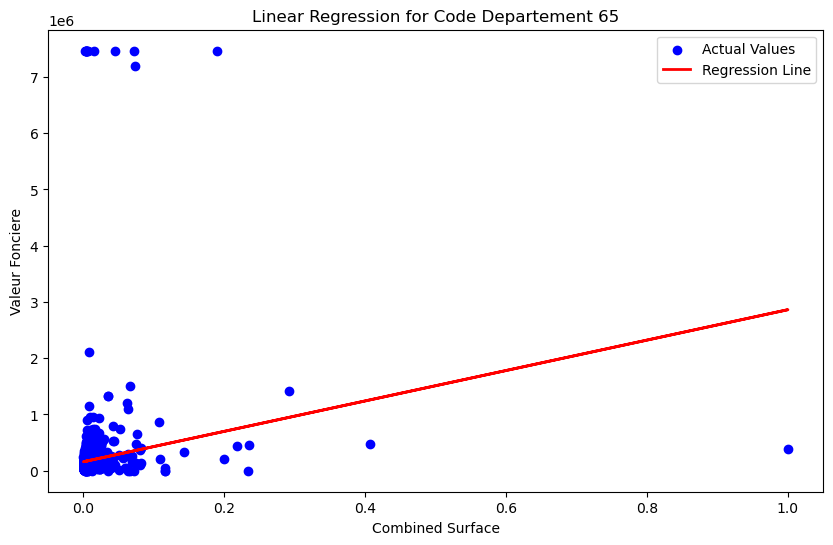

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 66
Mean Absolute Error: 92857.63116834567
Model Coefficients: [9141895.060466]


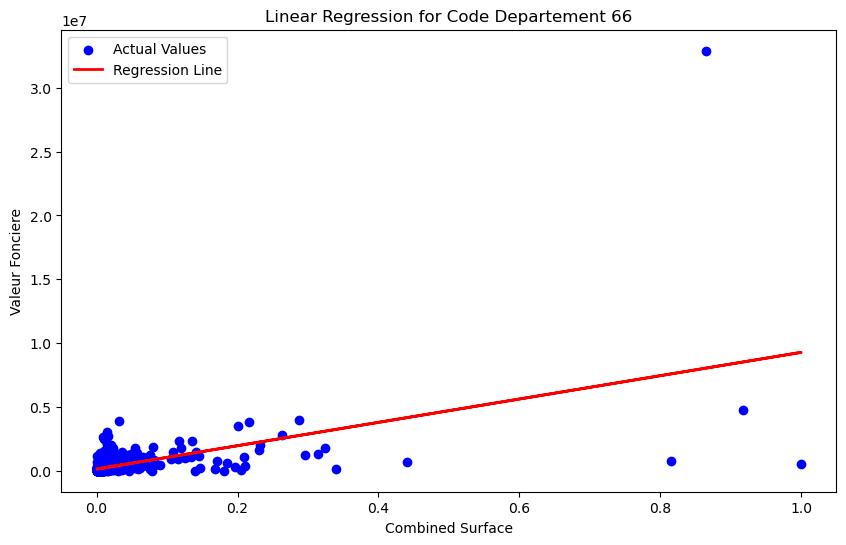

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 69
Mean Absolute Error: 181502.42763719047
Model Coefficients: [47859541.23092089]


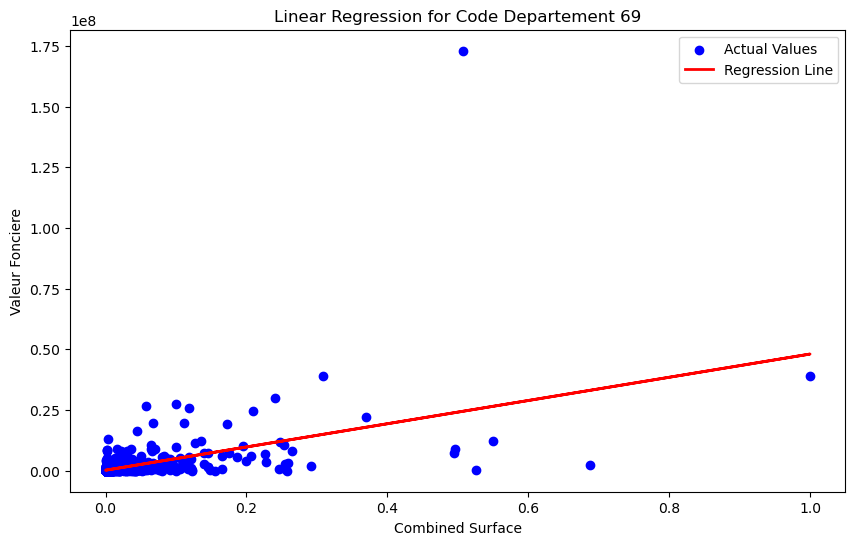

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 70
Mean Absolute Error: 71084.95680671465
Model Coefficients: [2336830.75709576]


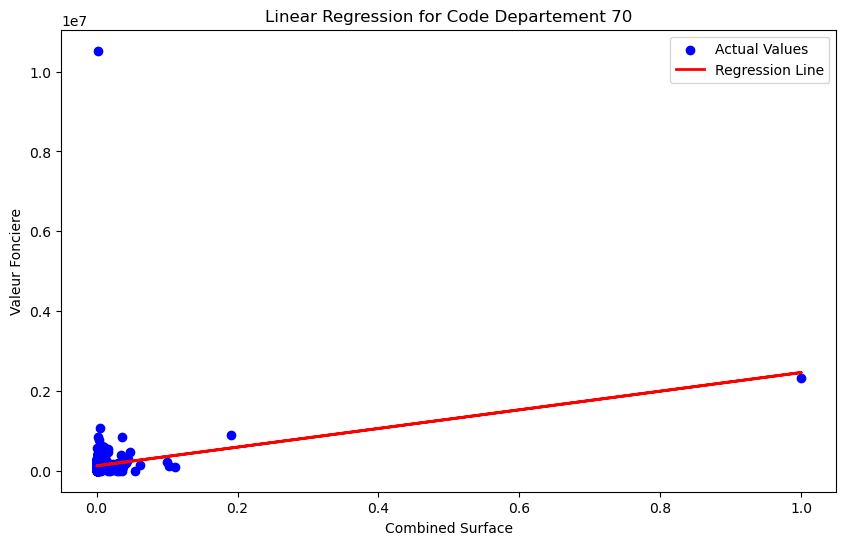

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 71
Mean Absolute Error: 84018.40031125066
Model Coefficients: [3806543.77039684]


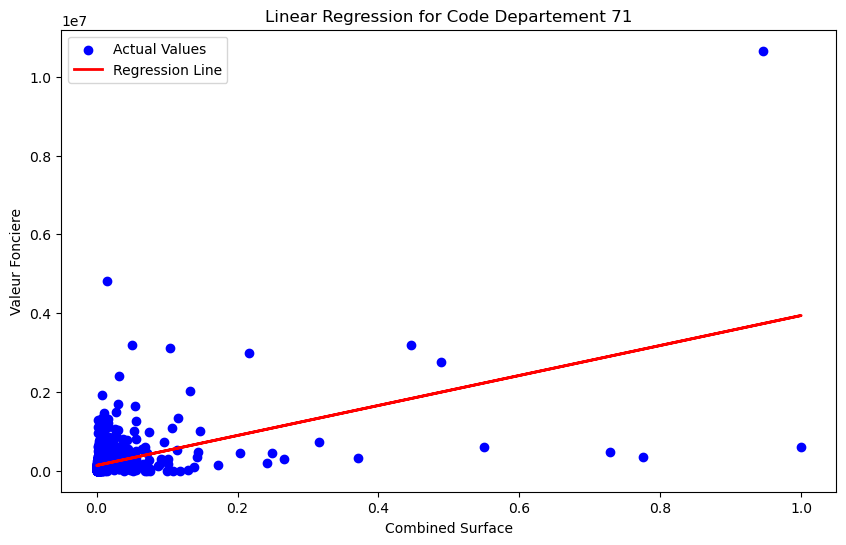

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 72
Mean Absolute Error: 88737.17654559866
Model Coefficients: [3234040.28294717]


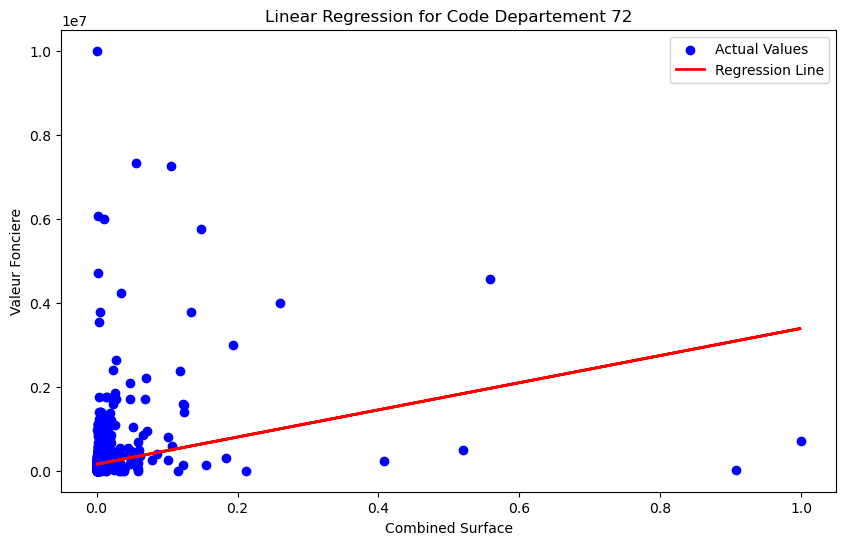

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 73
Mean Absolute Error: 233807.36679196317
Model Coefficients: [15780797.15523139]


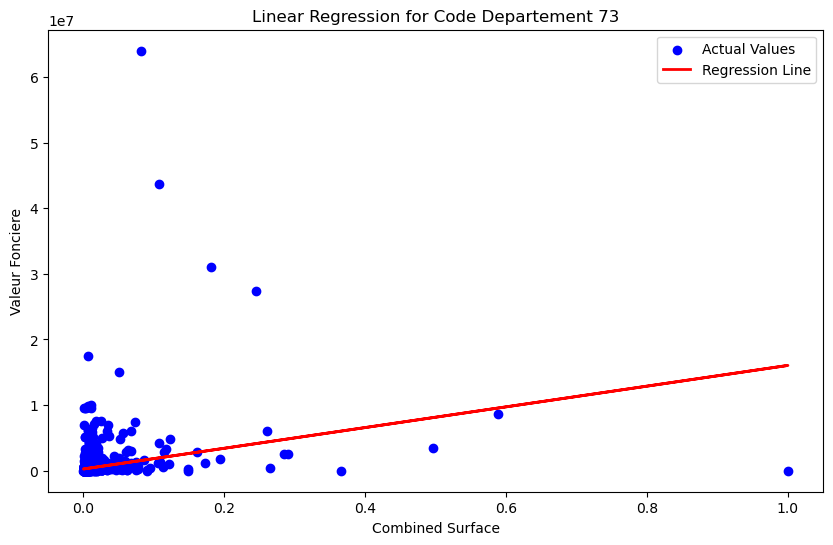

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 74
Mean Absolute Error: 237698.5964103002
Model Coefficients: [12287827.03591968]


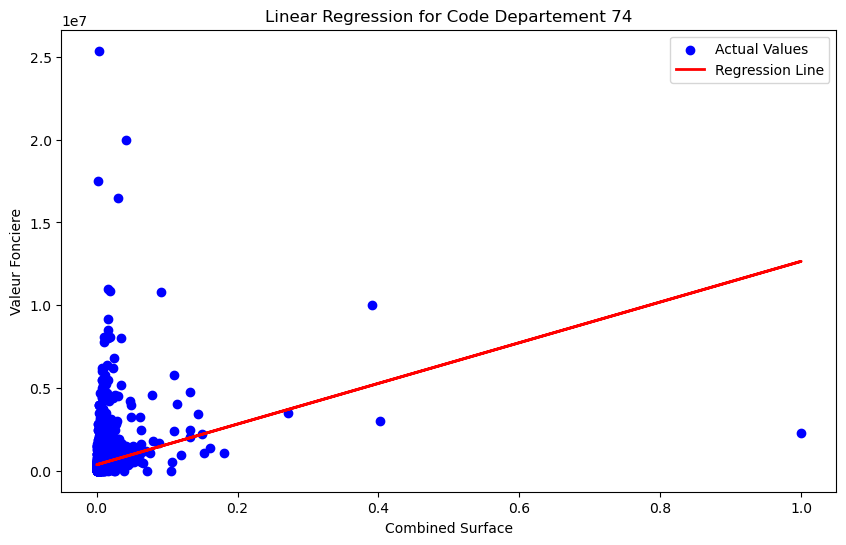

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 75
Mean Absolute Error: 521614.68202623696
Model Coefficients: [1.80008493e+08]


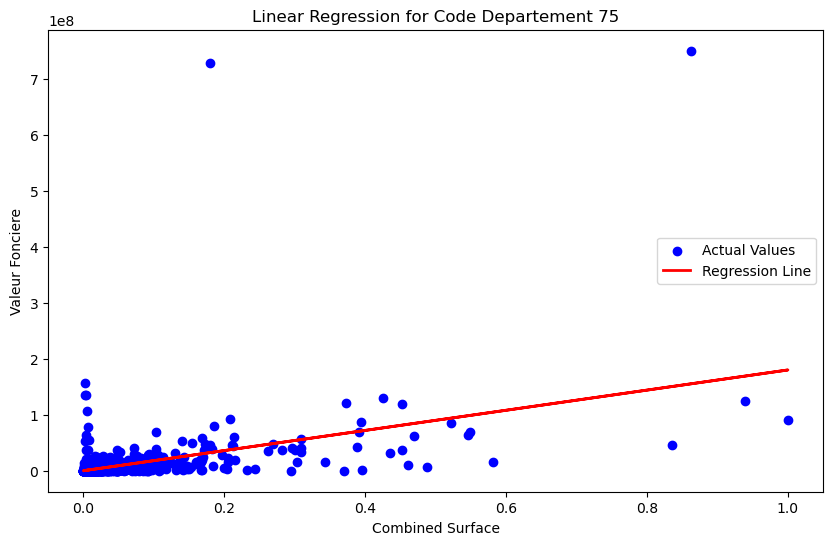

Code Departement: 76
Mean Absolute Error: 107667.33360408044
Model Coefficients: [19896385.85851648]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


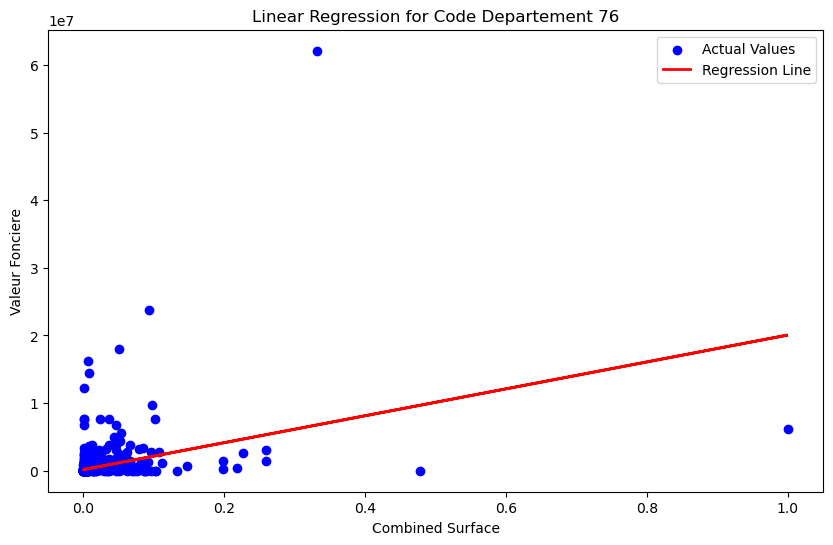

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 77
Mean Absolute Error: 135753.1092683966
Model Coefficients: [49032213.7190426]


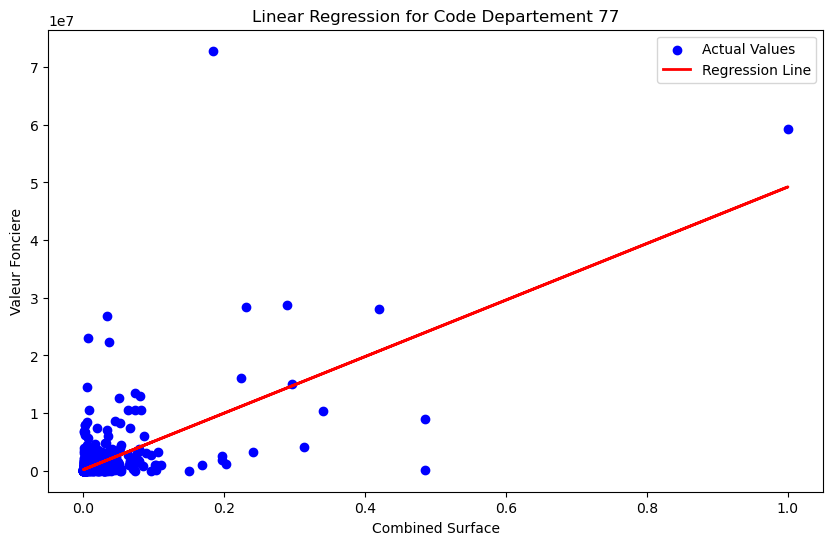

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 78
Mean Absolute Error: 229136.83010730814
Model Coefficients: [18029241.01720794]


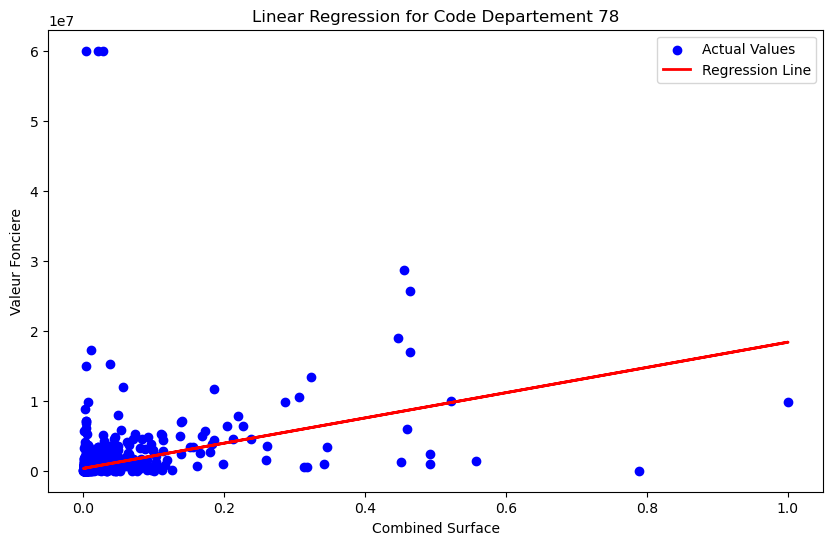

Code Departement: 79
Mean Absolute Error: 72621.54944504739
Model Coefficients: [2375083.57127785]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


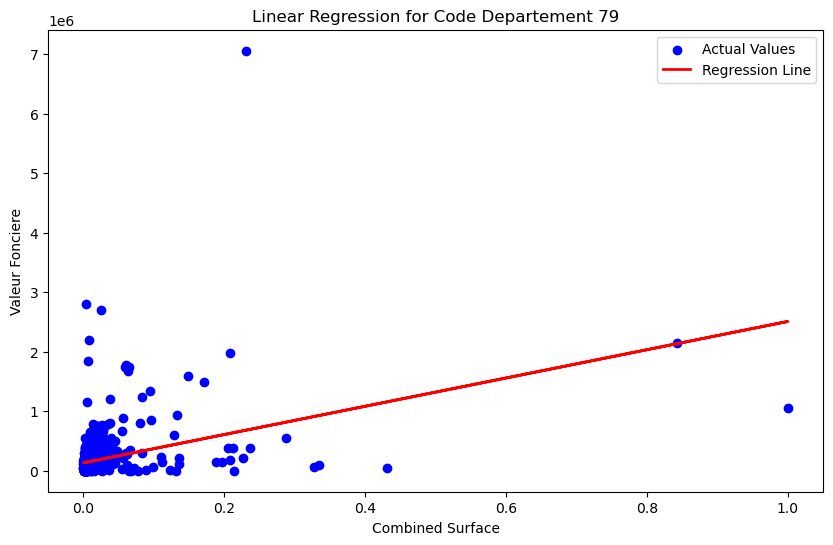

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 80
Mean Absolute Error: 89921.48448715206
Model Coefficients: [17394829.0338407]


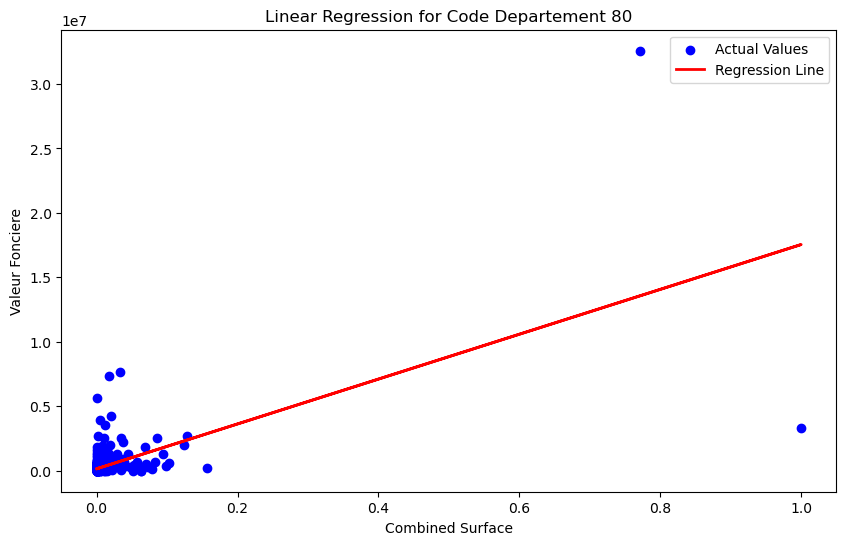

Code Departement: 81
Mean Absolute Error: 93330.0002114743
Model Coefficients: [1245563.76041053]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


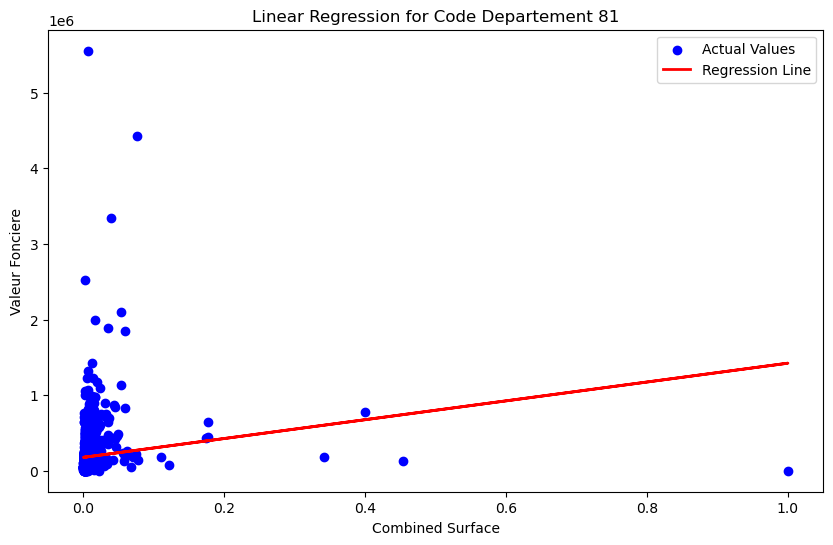

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 82
Mean Absolute Error: 80042.87968573807
Model Coefficients: [2081925.25333476]


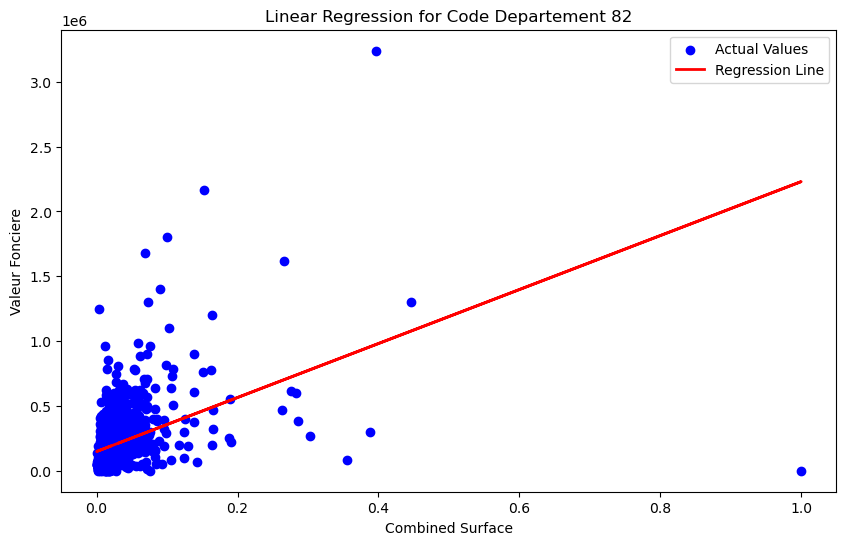

Code Departement: 83
Mean Absolute Error: 274747.14107168047
Model Coefficients: [20799078.99206596]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


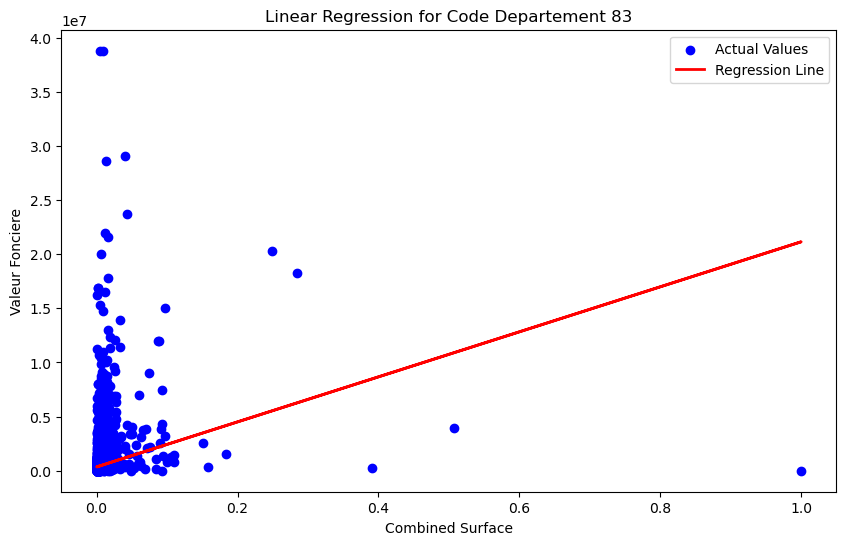

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 84
Mean Absolute Error: 164287.88729000321
Model Coefficients: [5687255.81108745]


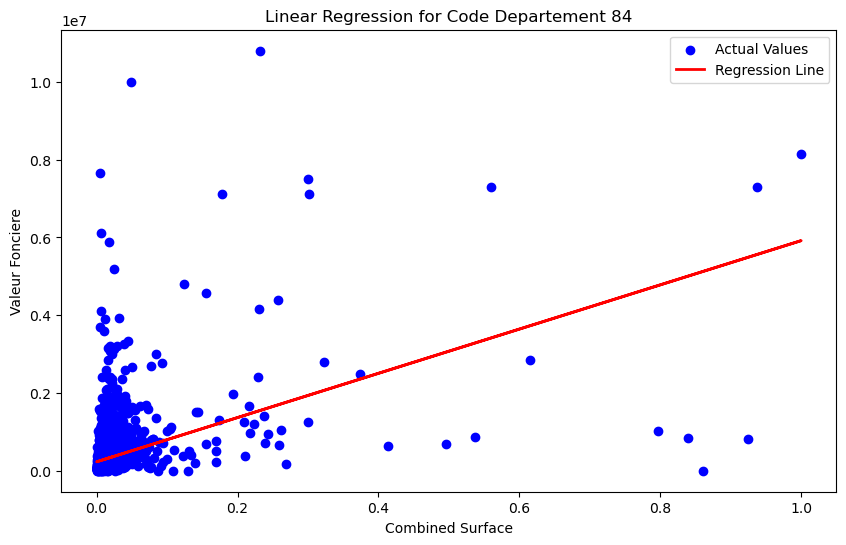

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 85
Mean Absolute Error: 111511.47343827969
Model Coefficients: [8132228.72853367]


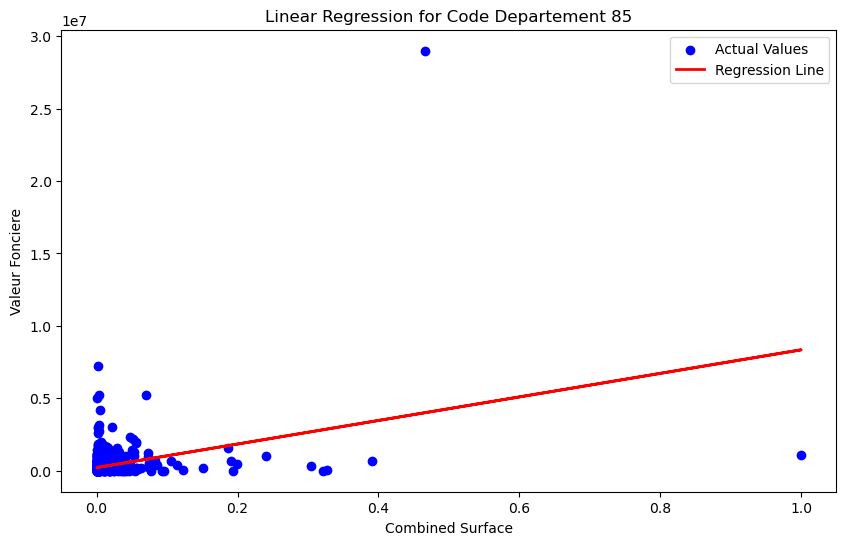

Code Departement: 86
Mean Absolute Error: 70426.71230742452
Model Coefficients: [1300722.80797871]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


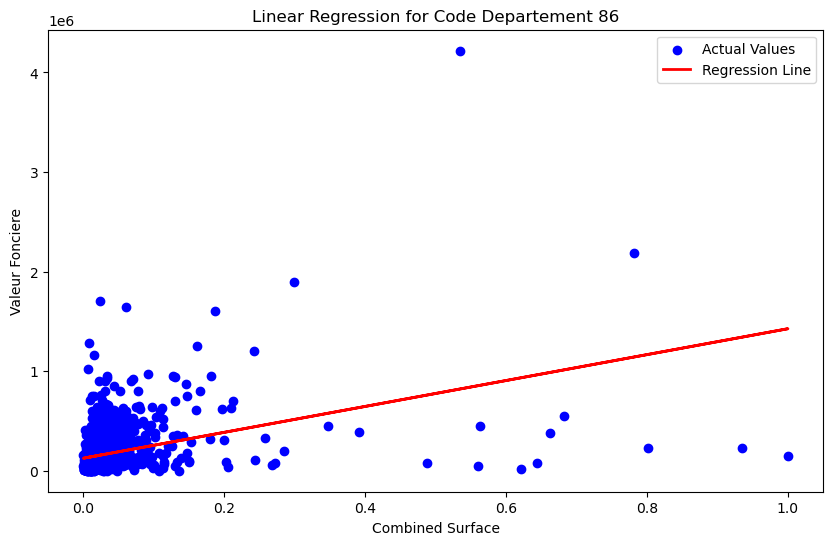

Code Departement: 87
Mean Absolute Error: 73323.9401605156
Model Coefficients: [2410349.78062007]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


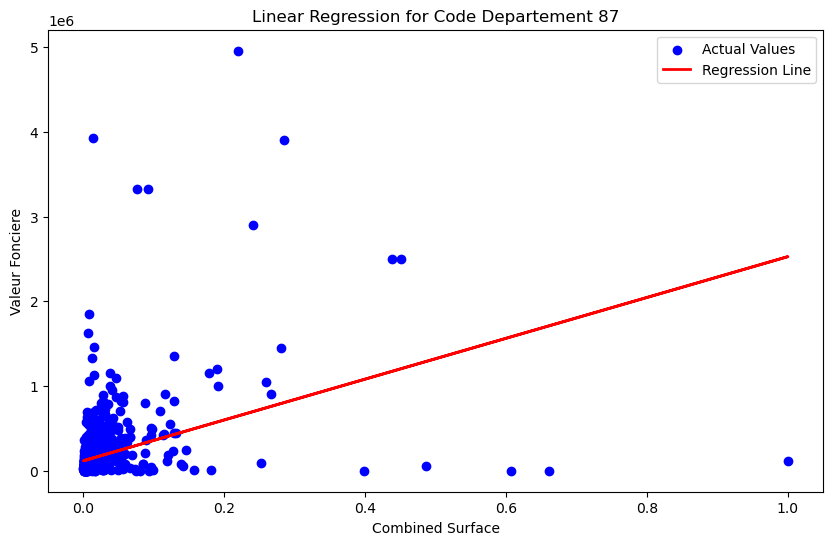

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 88
Mean Absolute Error: 85158.03028232574
Model Coefficients: [928229.56007436]


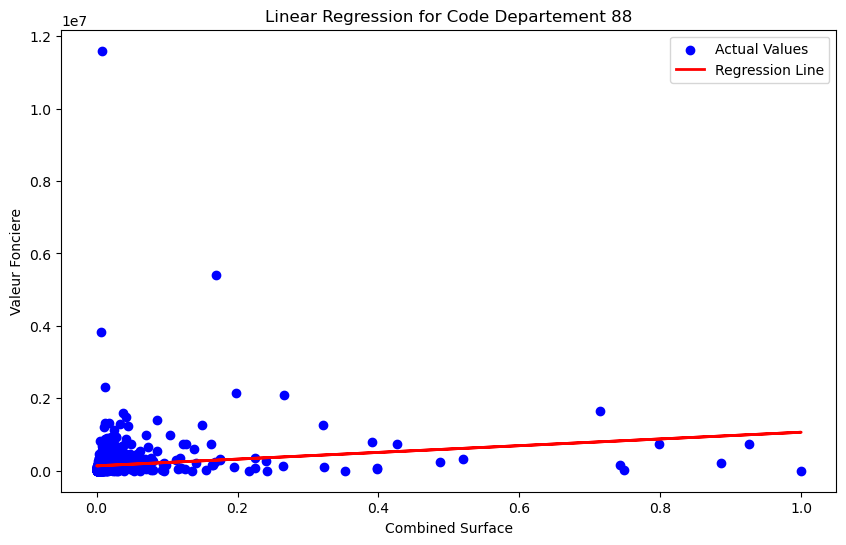

Code Departement: 89
Mean Absolute Error: 69941.28385883909
Model Coefficients: [3083835.68749259]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


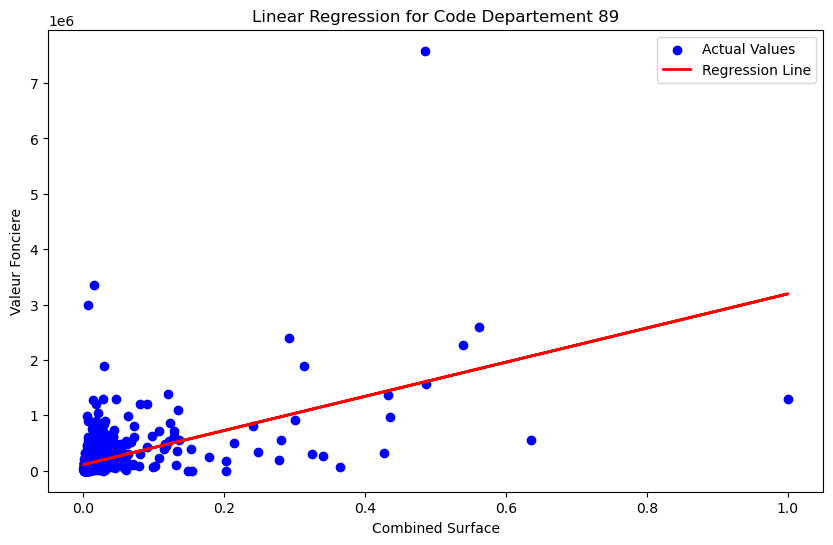

Code Departement: 90
Mean Absolute Error: 81930.11542299642
Model Coefficients: [1426922.64617493]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


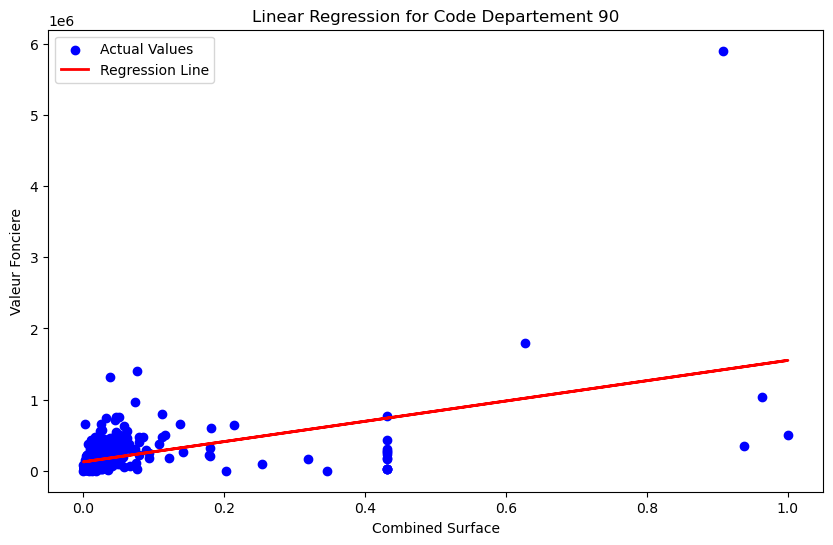

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 91
Mean Absolute Error: 133895.34811243272
Model Coefficients: [1.59645016e+08]


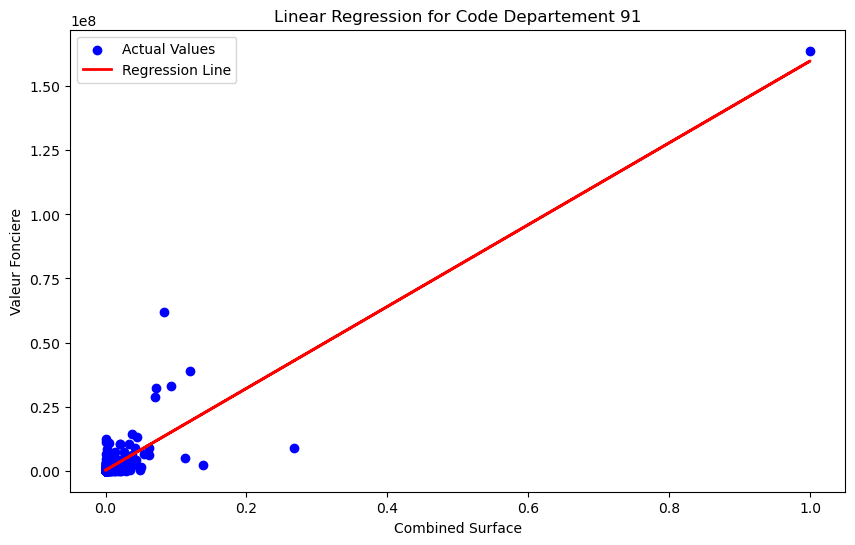

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 92
Mean Absolute Error: 327149.6169039454
Model Coefficients: [1.17762131e+08]


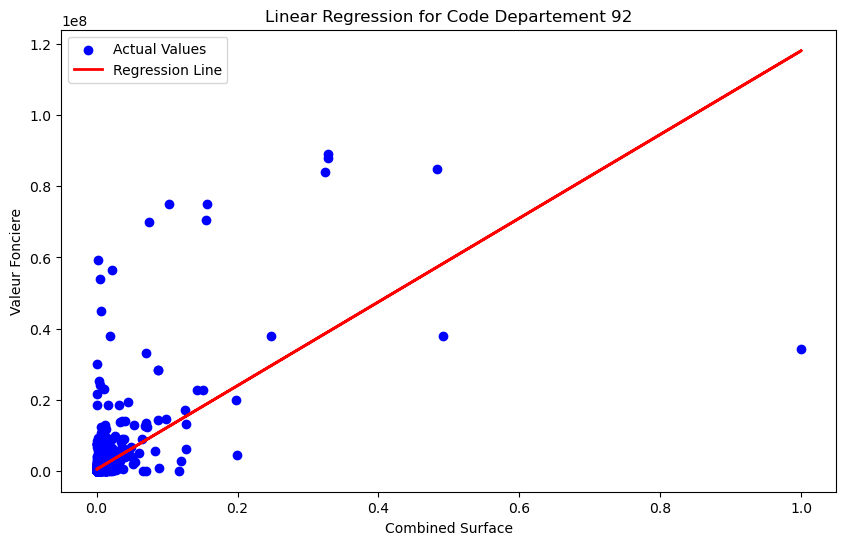

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 93
Mean Absolute Error: 197819.1912903522
Model Coefficients: [20472824.56240484]


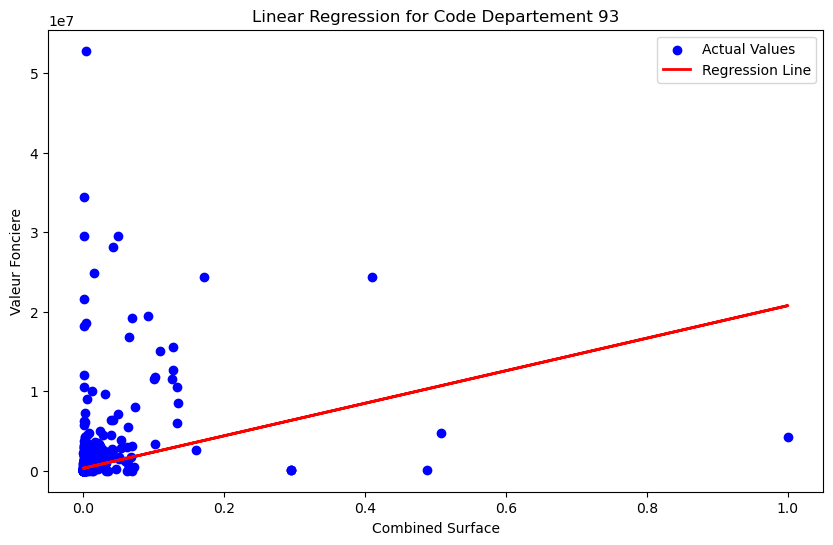

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 94
Mean Absolute Error: 205011.71619968273
Model Coefficients: [29443323.80468079]


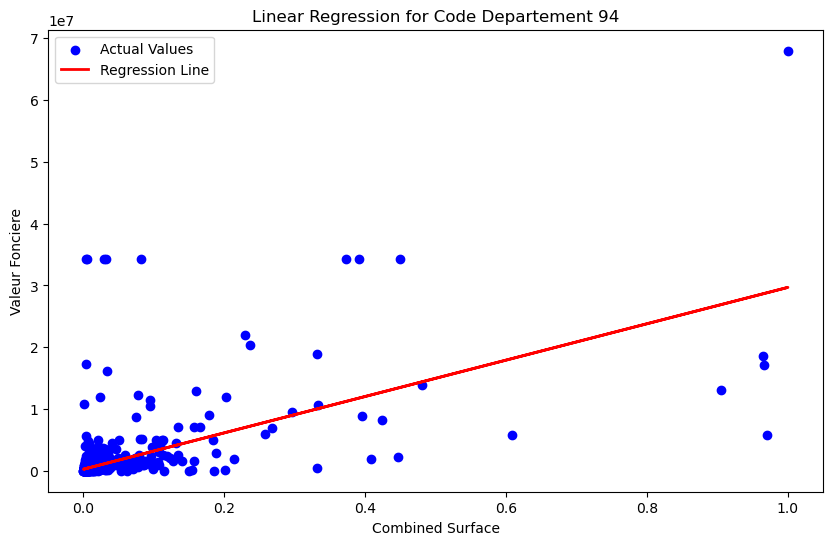

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 95
Mean Absolute Error: 172354.18448391958
Model Coefficients: [29917035.15947249]


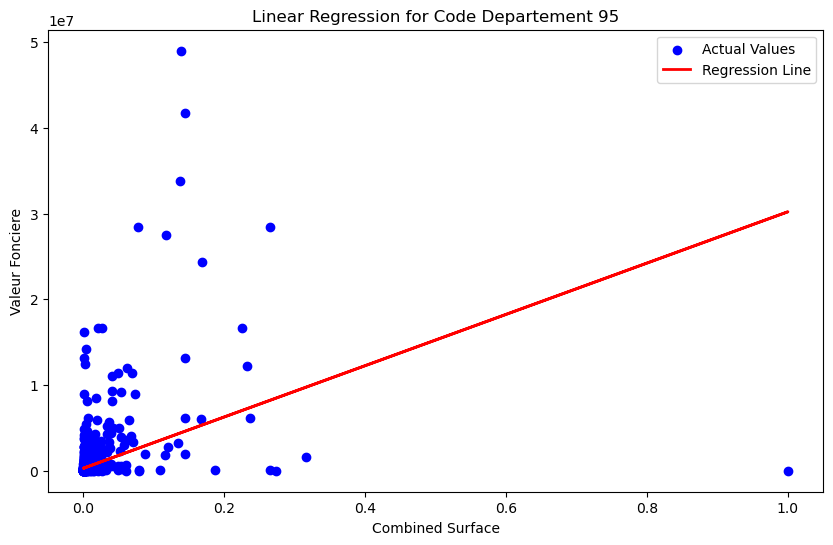

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 971
Mean Absolute Error: 234293.0699577004
Model Coefficients: [36049012.75115797]


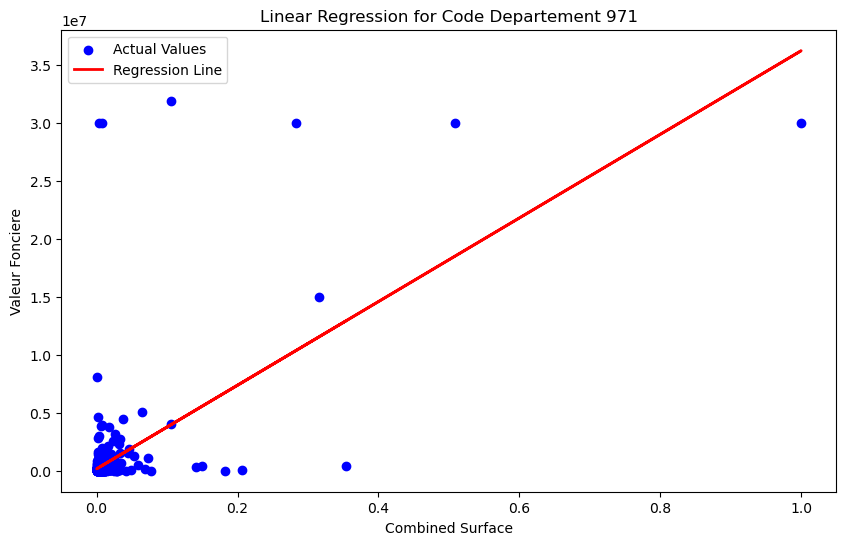

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 972
Mean Absolute Error: 149530.55851293268
Model Coefficients: [7427212.97124156]


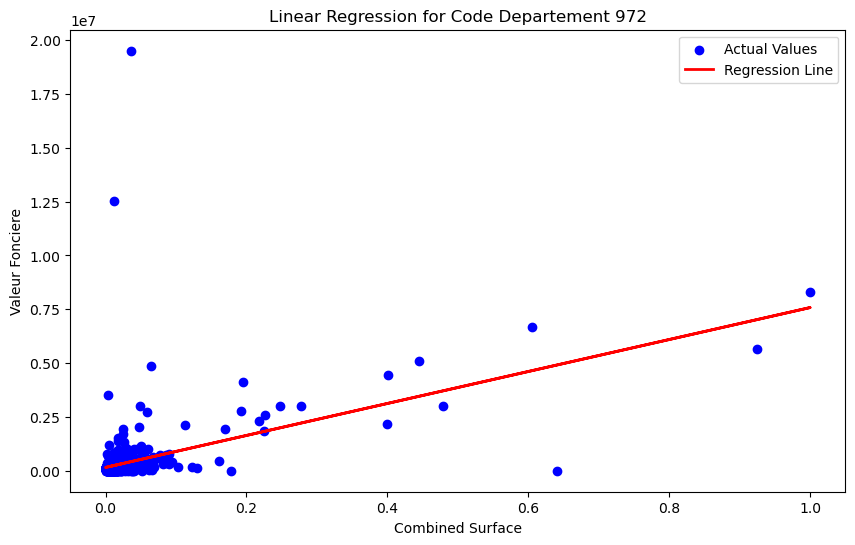

Code Departement: 973
Mean Absolute Error: 169024.34642593964
Model Coefficients: [6701369.47309361]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


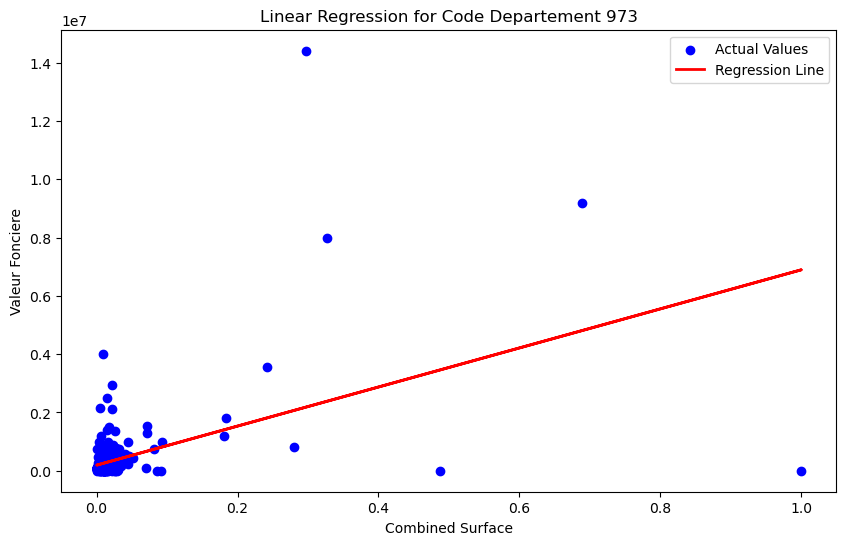

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 974
Mean Absolute Error: 147434.44149167396
Model Coefficients: [27506384.36551676]


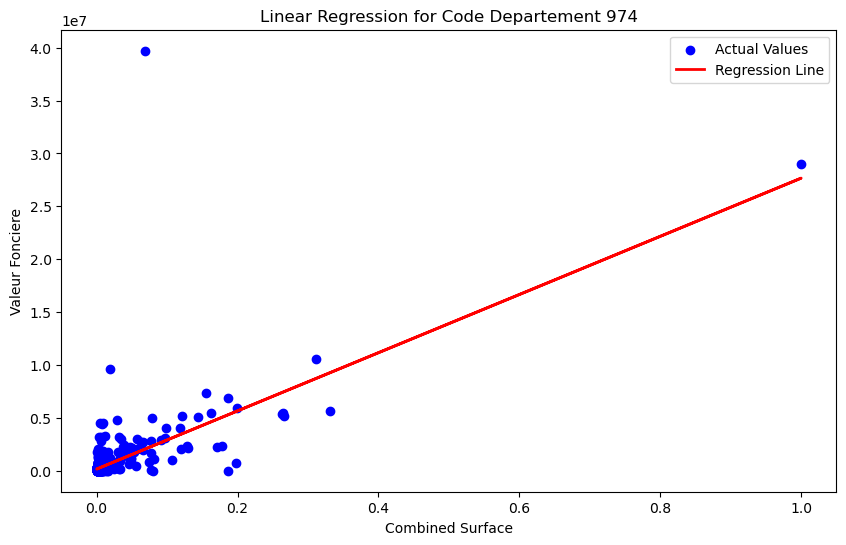

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 2A
Mean Absolute Error: 334856.3516490607
Model Coefficients: [10371824.78638531]


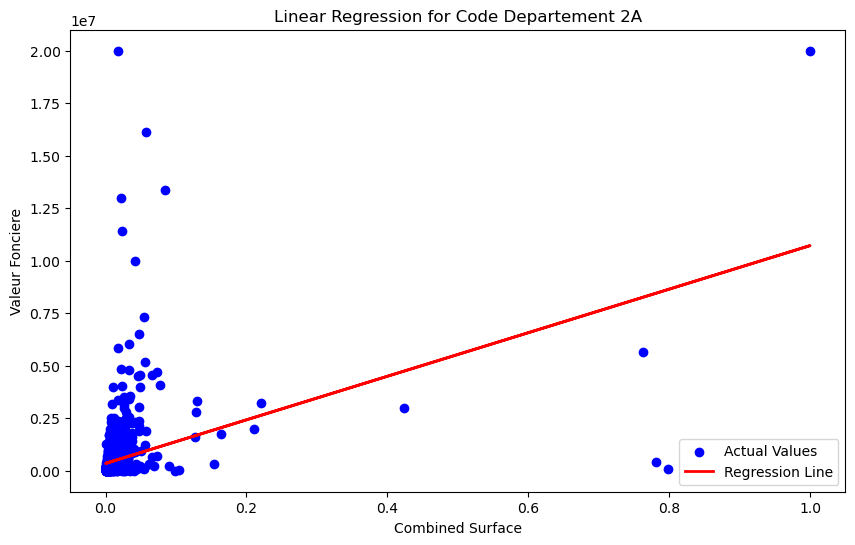

/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/422851239.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Surface_combined']] = scaler.fit_transform(X[['Surface_combined']])


Code Departement: 2B
Mean Absolute Error: 133565.27569236787
Model Coefficients: [7044031.32146407]


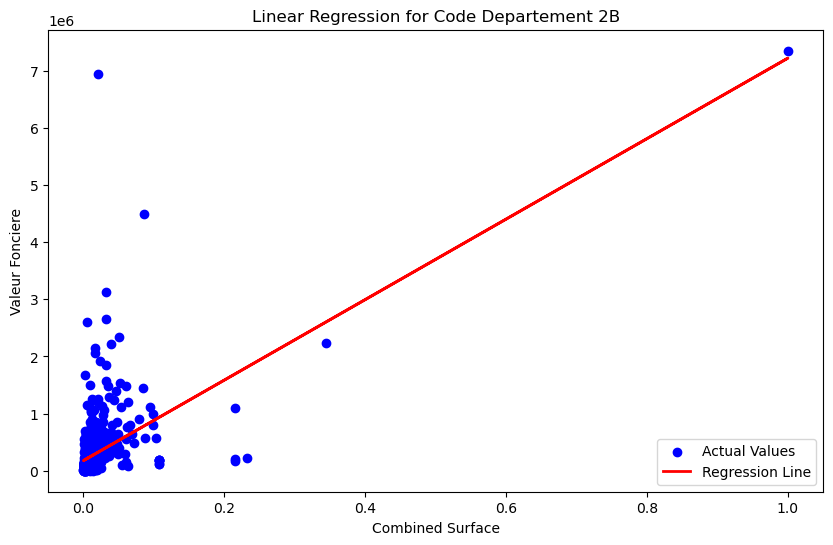

Predicted Valeur Fonciere for Code departement 1 with Combined Surface 1000.0: 3318690264.5643873


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Check unique values in 'Code departement' column
unique_code_departement = aggregated_data['Code departement'].unique()
print("Unique values in 'Code departement':", unique_code_departement)

# Dictionary to store models
models = {}

# Loop through each unique 'Code departement' and create a plot
for specific_code_departement in unique_code_departement:
    # Filter the data for the specific Code departement
    filtered_data = aggregated_data[aggregated_data['Code departement'] == specific_code_departement]

    # Define X and y for the filtered data
    X = filtered_data[['Surface_combined']]
    y = filtered_data['Valeur fonciere']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Normalize the numerical feature 'Surface_combined' using MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Store the model in the dictionary
    models[specific_code_departement] = model

    # Predict values
    y_pred = model.predict(X_test_scaled)

    # Calculate Mean absoltue Error
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Code Departement: {specific_code_departement}")
    print("Mean Absolute Error:", mae)
    print("Model Coefficients:", model.coef_)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual Values')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.xlabel('Combined Surface')
    plt.ylabel('Valeur Fonciere')
    plt.title(f'Linear Regression for Code Departement {specific_code_departement}')
    plt.legend()
    plt.show()

# Function to predict values using the stored models
def predict_value(code_departement, surface_combined):
    if code_departement not in models:
        print(f"No model found for Code departement: {code_departement}")
        return None
    model = models[code_departement]
    surface_combined_scaled = scaler.transform([[surface_combined]])
    prediction = model.predict(surface_combined_scaled)
    return prediction[0]

# Example usage of the prediction function
example_code_departement = '1'
example_surface_combined = 1000.0
predicted_value = predict_value(example_code_departement, example_surface_combined)
if predicted_value is not None:
    print(f"Predicted Valeur Fonciere for Code departement {example_code_departement} with Combined Surface {example_surface_combined}: {predicted_value}")


In [ ]:
"""
df=pd.read_csv("length_of_stay.csv")

model = LinearRegression()

X=df[["Surface_combined"]]
y=df["length_of_stay"]

model.fit(X,y)

y_pred=model.predict(X)

mse=mean_squared_error(y,y_pred)
print(mse)

print(model.coef_)
"""


'\ndf=pd.read_csv("length_of_stay.csv")\n\nmodel = LinearRegression()\n\nX=df[["Surface_combined"]]\ny=df["length_of_stay"]\n\nmodel.fit(X,y)\n\ny_pred=model.predict(X)\n\nmse=mean_squared_error(y,y_pred)\nprint(mse)\n\nprint(model.coef_)\n'